# Import

## Dependencies

In [1]:
import time
import numpy as np
import pandas as pd
start_time = time.time()
from tqdm import tqdm
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

## Data

In [2]:
# Load np array
features = np.load('../10_data/features.npy', allow_pickle=True)

bags_train = np.load('../10_data/bags.npy', allow_pickle=True)
id_bags_train = np.load('../10_data/id_bags.npy', allow_pickle=True)
date_bags_train = np.load('../10_data/date_bags.npy', allow_pickle=True)
y_round_up_bag_train = np.load('../10_data/y_round_up_bag.npy', allow_pickle=True).astype('int')
y_ins_train = np.load('../10_data/y_ins.npy', allow_pickle=True)

In [3]:
def print_data_stats(list_x, list_y):
    print('- There are {} bags'.format(len(list_x)))
    print('- There are {} labels with values [{}]'.format(len(list_y), ', '.join([str(i) for i in np.unique(list_y)])))
    
    bags_len = [len(i) for i in list_x]
    print('- Bags length varies between {} and {}'.format(min(bags_len), max(bags_len)))
    
    elem_len = [len(e) for sl in list_x for e in sl]
    print('- Element length varies between {} and {}'.format(min(elem_len), max(elem_len)))

print('Training set:')
print_data_stats(bags_train, y_round_up_bag_train)

Training set:
- There are 13813 bags
- There are 13813 labels with values [0, 1]
- Bags length varies between 1 and 78
- Element length varies between 14 and 14


## Example

In [4]:
def draw_example(df_bags, df_bags_ins, df_bags_y_round_up, df_bag_id, df_bag_date=None):
    bag_idx = np.random.randint(0, len(df_bags))
    print('Selected bag with id {}'.format(bag_idx))
    if df_bag_date is not None:
        print('Selected bag with date {}'.format(df_bag_date[bag_idx]))
    print('{} invoice lines'.format(len(df_bags[bag_idx])))
    
    print_bag_details(bag_idx, df_bags_ins, df_bags_y_round_up, df_bag_id)
    
    return bag_idx

def print_bag_details(bag_idx, df_bags_ins, df_bags_y_round_up, df_bag_id, search_admin_customer=False):
    print('bag label \'Round up\' = {}'.format(df_bags_y_round_up[bag_idx]))
    print('instance labels = {}'.format(df_bags_ins[bag_idx]))
    print('Invoice nr = {}'.format(df_bag_id[bag_idx]))

    if search_admin_customer:
        from admin import admin_sql
        cnxn_sql = admin_sql.AdminSql(r'C:\Users\Ward.RFN\Downloads\credentials\AdminSQL_Credentials_Production.json')
        print('Customer Id = {}'.format(cnxn_sql.sql_query('SELECT CUSTOMER_ID FROM DBA.INVOICE WHERE INVOICE_NR = \'{}\''.format(df_bag_id[bag_idx]))['CUSTOMER_ID'].iloc[0]))

bag_idx = draw_example(bags_train, y_ins_train, y_round_up_bag_train, id_bags_train, date_bags_train)

Selected bag with id 10875
Selected bag with date [2021 10 43]
11 invoice lines
bag label 'Round up' = 1
instance labels = ['NONE' 'NONE' 'NONE' 'NONE' 'NONE' 'NONE' 'NONE' 'ROUND_UP' 'NONE'
 'OTHER' 'NONE']
Invoice nr = 2205451


In [5]:
y_ins_train[bag_idx]

array(['NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'ROUND_UP',
       'NONE', 'OTHER', 'NONE'], dtype=object)

In [6]:
pd.DataFrame(data=bags_train[bag_idx], columns=features).head()

,INVOICE_RATE_HOUR,REG_OBJECT_INVOICED,REMARK_LENGTH,INTERNAL_REMARK_LENGTH,LINE_TARIFF,LINE_ORIGINAL_QUANTITY,F_PRESTATION_BY_PM,F_COLLEAGUE_EXP_DAYS,F_PM_EXP_DAYS,F_DISTANCE_5_MIN,F_DISTANCE_10_MIN,F_DIFF_SELL_TO_CUST,PROJECT_TYPE_DESCRIPTION_Dossier Compta,PROJECT_TYPE_DESCRIPTION_Dossier Social
0,42.743332,1.0,198.0,51.0,108.500000,15.0,0.0,2775.0,3350.0,0.0,0.0,0.0,1.0,0.0
1,42.743332,1.0,68.0,0.0,108.500000,15.0,0.0,5914.0,3346.0,0.0,0.0,0.0,1.0,0.0
2,42.743332,0.0,88.0,35.0,83.199997,25.0,1.0,3318.0,3318.0,1.0,0.0,0.0,1.0,0.0
3,42.743332,0.0,77.0,0.0,83.199997,10.0,1.0,3319.0,3319.0,1.0,0.0,0.0,1.0,0.0
4,42.743332,0.0,42.0,36.0,83.199997,10.0,0.0,379.0,3350.0,1.0,0.0,0.0,1.0,0.0


# Limit dataset size

In [7]:
invoice_months = np.array([i[1] for i in date_bags_train])
pd.DataFrame(np.unique(invoice_months, return_counts=True))

,0,1,2,3,4,5,6,7,8,9,10,11
0,1,2,3,4,5,6,7,8,9,10,11,12
1,1078,1073,1105,1457,731,1305,1249,986,1105,1276,1262,1186


In [8]:
train_month = 4

bags_train_1 = bags_train[invoice_months == train_month]
id_bags_train_1 = id_bags_train[invoice_months == train_month]
y_round_up_bag_train_1 = y_round_up_bag_train[invoice_months == train_month]
y_ins_train_1 = y_ins_train[invoice_months == train_month]

bags_train_2 = bags_train[invoice_months == train_month+1]
id_bags_train_2 = id_bags_train[invoice_months == train_month+1]
y_round_up_bag_train_2 = y_round_up_bag_train[invoice_months == train_month+1]
y_ins_train_2 = y_ins_train[invoice_months == train_month+1]

# Pipeline components

## StandarizerBagsList

In [9]:
from preprocessing.standarize_bags import StandarizerBagsList

bag_standardizer = StandarizerBagsList()

start_time = time.time()
bag_standardizer.fit(bags_train_1)
print("Standardizer fitting time: {:.2f} sec".format(time.time() - start_time))

# Print average and stdev time registration
pd.DataFrame(data=[bag_standardizer.mean, bag_standardizer.std], columns=features)

Standardizer fitting time: 0.02 sec


,INVOICE_RATE_HOUR,REG_OBJECT_INVOICED,REMARK_LENGTH,INTERNAL_REMARK_LENGTH,LINE_TARIFF,LINE_ORIGINAL_QUANTITY,F_PRESTATION_BY_PM,F_COLLEAGUE_EXP_DAYS,F_PM_EXP_DAYS,F_DISTANCE_5_MIN,F_DISTANCE_10_MIN,F_DIFF_SELL_TO_CUST,PROJECT_TYPE_DESCRIPTION_Dossier Compta,PROJECT_TYPE_DESCRIPTION_Dossier Social
0,98.294643,0.0,102.554567,10.435445,90.406206,35.758912,0.0,1899.047168,1718.275133,0.0,0.0,0.0,0.0,0.0
1,42.007761,1.0,75.855712,27.211481,11.432083,53.854728,1.0,1782.927114,1432.839740,1.0,1.0,1.0,1.0,1.0


### Example

In [10]:
bag_idx = draw_example(bags_train_2, y_round_up_bag_train_2, id_bags_train_2, id_bags_train_2)

Selected bag with id 236
10 invoice lines
bag label 'Round up' = 2107741
instance labels = 1
Invoice nr = 2107741


In [11]:
# Show example bag
pd.DataFrame(data=bags_train_2[bag_idx], columns=features).head(3)

,INVOICE_RATE_HOUR,REG_OBJECT_INVOICED,REMARK_LENGTH,INTERNAL_REMARK_LENGTH,LINE_TARIFF,LINE_ORIGINAL_QUANTITY,F_PRESTATION_BY_PM,F_COLLEAGUE_EXP_DAYS,F_PM_EXP_DAYS,F_DISTANCE_5_MIN,F_DISTANCE_10_MIN,F_DIFF_SELL_TO_CUST,PROJECT_TYPE_DESCRIPTION_Dossier Compta,PROJECT_TYPE_DESCRIPTION_Dossier Social
0,83.199997,1.0,43.0,0.0,83.199997,20.0,0.0,871.0,451.0,0.0,1.0,0.0,1.0,0.0
1,83.199997,1.0,172.0,0.0,83.199997,225.0,1.0,471.0,471.0,0.0,0.0,0.0,1.0,0.0
2,83.199997,1.0,124.0,0.0,83.199997,10.0,1.0,449.0,449.0,1.0,0.0,0.0,1.0,0.0


In [12]:
# Transfrom one bag
pd.DataFrame(data=bag_standardizer.transform([bags_train_2[bag_idx]])[0], columns=features).head(3)

,INVOICE_RATE_HOUR,REG_OBJECT_INVOICED,REMARK_LENGTH,INTERNAL_REMARK_LENGTH,LINE_TARIFF,LINE_ORIGINAL_QUANTITY,F_PRESTATION_BY_PM,F_COLLEAGUE_EXP_DAYS,F_PM_EXP_DAYS,F_DISTANCE_5_MIN,F_DISTANCE_10_MIN,F_DIFF_SELL_TO_CUST,PROJECT_TYPE_DESCRIPTION_Dossier Compta,PROJECT_TYPE_DESCRIPTION_Dossier Social
0,-0.35933,1.0,-0.785103,-0.383494,-0.63035,-0.292619,0.0,-0.576606,-0.884450,0.0,1.0,0.0,1.0,0.0
1,-0.35933,1.0,0.915494,-0.383494,-0.63035,3.513918,1.0,-0.800957,-0.870492,0.0,0.0,0.0,1.0,0.0
2,-0.35933,1.0,0.282713,-0.383494,-0.63035,-0.478304,1.0,-0.813296,-0.885846,1.0,0.0,0.0,1.0,0.0


### Standardize data set

In [13]:
start_time = time.time()
bags_train_1_std = bag_standardizer.transform(bags_train_1)
print("Standardizer transform time (train set): {:.2f} sec".format(time.time() - start_time))

start_time = time.time()
bags_train_2_std = bag_standardizer.transform(bags_train_2)
print("Standardizer transform time (validation set): {:.2f} sec".format(time.time() - start_time))

Standardizer transform time (train set): 0.03 sec
Standardizer transform time (validation set): 0.01 sec


## MILESMapping

In [14]:
from bag_representation.miles_mapping import *

bag_miles_mapping = MILESMapping(sigma2=4.5**2, return_iip_bag_closest=True)


start_time = time.time()
bag_miles_mapping.fit(bags_train_1_std)
print("MILES Mapping fitting time: {:.2f} sec".format(time.time() - start_time))

MILES Mapping fitting time: 0.01 sec


### Example

In [15]:
bag_idx = draw_example(bags_train_2_std, y_round_up_bag_train_2, id_bags_train_2, id_bags_train_2)

Selected bag with id 561
7 invoice lines
bag label 'Round up' = 2108539
instance labels = 1
Invoice nr = 2108539


In [16]:
# Show example bag
pd.DataFrame(data=bags_train_2_std[bag_idx], columns=features).head(3)

,INVOICE_RATE_HOUR,REG_OBJECT_INVOICED,REMARK_LENGTH,INTERNAL_REMARK_LENGTH,LINE_TARIFF,LINE_ORIGINAL_QUANTITY,F_PRESTATION_BY_PM,F_COLLEAGUE_EXP_DAYS,F_PM_EXP_DAYS,F_DISTANCE_5_MIN,F_DISTANCE_10_MIN,F_DIFF_SELL_TO_CUST,PROJECT_TYPE_DESCRIPTION_Dossier Compta,PROJECT_TYPE_DESCRIPTION_Dossier Social
0,-0.35933,1.0,0.335445,-0.383494,-0.63035,0.542962,1.0,0.226006,0.407390,0.0,1.0,0.0,1.0,0.0
1,-0.35933,1.0,2.141506,-0.383494,-0.63035,-0.014092,1.0,0.222641,0.403203,0.0,1.0,0.0,1.0,0.0
2,-0.35933,1.0,1.785567,-0.383494,-0.63035,-0.292619,1.0,0.234980,0.418557,0.0,1.0,0.0,1.0,0.0


In [17]:
# Transfrom one bag
test, test_closest = bag_miles_mapping.transform([bags_train_2_std[bag_idx]])
test, test_closest = test[0], test_closest[0] 
print('length = {}; max = {:.2f}; min = {:.2f}'.format(len(test), test.max(), test.min()))
test

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 52.63it/s]

length = 13717; max = 1.00; min = 0.00


array([0.76025744, 0.62166434, 0.76604832, ..., 0.57252751, 0.43497492,
       0.568976  ])

In [18]:
from utils.utils import bags2instances

# Intermediary instance pool
iip = bags2instances(bags_train_1)

# Show similar lines from iip compared with example bag
print('{} lines in iip are similar to one of the lines of this bag.'.format(len(np.where(test > .999)[0])))
pd.DataFrame(data=iip[np.where(test > .999)], columns=features).head(50)

16 lines in iip are similar to one of the lines of this bag.


,INVOICE_RATE_HOUR,REG_OBJECT_INVOICED,REMARK_LENGTH,INTERNAL_REMARK_LENGTH,LINE_TARIFF,LINE_ORIGINAL_QUANTITY,F_PRESTATION_BY_PM,F_COLLEAGUE_EXP_DAYS,F_PM_EXP_DAYS,F_DISTANCE_5_MIN,F_DISTANCE_10_MIN,F_DIFF_SELL_TO_CUST,PROJECT_TYPE_DESCRIPTION_Dossier Compta,PROJECT_TYPE_DESCRIPTION_Dossier Social
0,83.199997,1.0,197.0,0.0,83.199997,10.0,1.0,2282.0,2282.0,1.0,0.0,0.0,1.0,0.0
1,83.199997,1.0,265.0,0.0,83.199997,35.0,1.0,2275.0,2275.0,0.0,1.0,0.0,1.0,0.0
2,83.199997,1.0,133.0,0.0,83.199997,10.0,1.0,2254.0,2254.0,1.0,0.0,0.0,1.0,0.0
3,83.199997,1.0,115.0,0.0,83.199997,10.0,1.0,2294.0,2294.0,1.0,0.0,0.0,1.0,0.0
4,80.969902,1.0,184.0,0.0,83.199997,10.0,1.0,2294.0,2294.0,1.0,0.0,0.0,1.0,0.0
5,80.969902,1.0,122.0,0.0,83.199997,10.0,1.0,2288.0,2288.0,1.0,0.0,0.0,1.0,0.0
6,84.944824,1.0,188.0,0.0,83.199997,10.0,1.0,2300.0,2300.0,1.0,0.0,0.0,1.0,0.0
7,83.167740,1.0,123.0,0.0,83.199997,10.0,1.0,2307.0,2307.0,1.0,0.0,0.0,1.0,0.0
8,83.167740,1.0,124.0,0.0,83.199997,10.0,1.0,2289.0,2289.0,1.0,0.0,0.0,1.0,0.0
9,79.418182,1.0,188.0,0.0,83.199997,10.0,1.0,2290.0,2290.0,1.0,0.0,0.0,1.0,0.0


### Apply MILES Mapping on data set

In [19]:
bags_train_std_miles, bags_train_std_miles_closest = bag_miles_mapping.transform(bags_train_1_std)

bags_validation_std_miles, bags_validation_std_miles_closest = bag_miles_mapping.transform(bags_train_2_std)

100%|████████████████████████████████████████████████████████████████████████████████| 731/731 [00:17<00:00, 42.06it/s]


## Model: Random forest

In [20]:
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, confusion_matrix

def model_evaluation(y, y_predicted, min_recall=.95, prob_col=1):
    y_predicted = np.array([float(i) for i in y_predicted.iloc[:, prob_col]])
    
    #Get ROC values for entire validation set
    fpr, tpr, _ = roc_curve(y_true=y, y_score=y_predicted)
    print("AUC = {}".format(roc_auc_score(y, y_predicted)))
    
    # Get Precision/Recall
    precision, recall, thresholds = precision_recall_curve(y_true=y, probas_pred=y_predicted)
    thresholds = [0] + thresholds.tolist()
    min_recall_threshold = thresholds[np.abs(recall - min_recall).argmin()]
    
    # Calulate specificity at this rate
    tn, fp, fn, tp = confusion_matrix(y, y_predicted>min_recall_threshold).ravel()
    specificity = (tn / (tn+fp))*100
    
    print('Recall of {:.2f} % reached on {:.3f} threshold. This equals a {:.3f} % precision'.format(min_recall*100, min_recall_threshold, specificity))
    
    # Create figure
    fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 5), dpi=80)
    
    # Figure 1 - ROC
    axs[0].plot(fpr, tpr, lw=1, color='black')
    axs[0].plot([0, 1], [0, 1], color='black', linestyle='dashed')
    axs[0].set(xlabel='False Positive Rate', ylabel='True Positive Rate', title='ROC', xlim=[-0.05, 1.05], ylim=[-0.05, 1.05])
    
    # Figure 2 - Precision/Recall
    axs[1].plot(recall, precision, lw=1, color='black')
    axs[1].set(xlabel='Recall', ylabel='Precision', title='Precision/Recall', xlim=[-0.05, 1.05], ylim=[-0.05, 1.05])
    
    # Figure 3 - Precision/Recall
    axs[2].plot(thresholds, precision, label='precision', lw=1, color='black', ls='dotted')
    axs[2].plot(thresholds, recall, label='recall', lw=1, color='black', ls='dashed')
    axs[2].axhline(min_recall, lw=1, color='red')
    axs[2].axvline(min_recall_threshold, ls='--', lw=1, color='black')
    axs[2].legend()
    axs[2].set(xlabel='Threshold', ylabel='Recall/Precision', title='Precision/Recall', xlim=[-0.05, 1.05], ylim=[-0.05, 1.05])
    
    return min_recall_threshold, specificity

### Fit RF Model

In [21]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=800, max_depth=10, random_state=None, bootstrap=True, n_jobs=-1)

start_time = time.time()
rf.fit(X=bags_train_std_miles, y=y_round_up_bag_train_1)
print("RandomForest fitting time: {:.2f} sec".format(time.time() - start_time))

RandomForest fitting time: 10.85 sec


### Evaluate Validation set

In [22]:
start_time = time.time()
y_bag_validation_pred = pd.DataFrame(rf.predict_proba(bags_validation_std_miles))
print("RandomForest prediction time (validation set): {:.2f} sec".format(time.time() - start_time))

RandomForest prediction time (validation set): 0.30 sec


AUC = 0.7959080414967619
Recall of 95.00 % reached on 0.272 threshold. This equals a 38.259  % precision


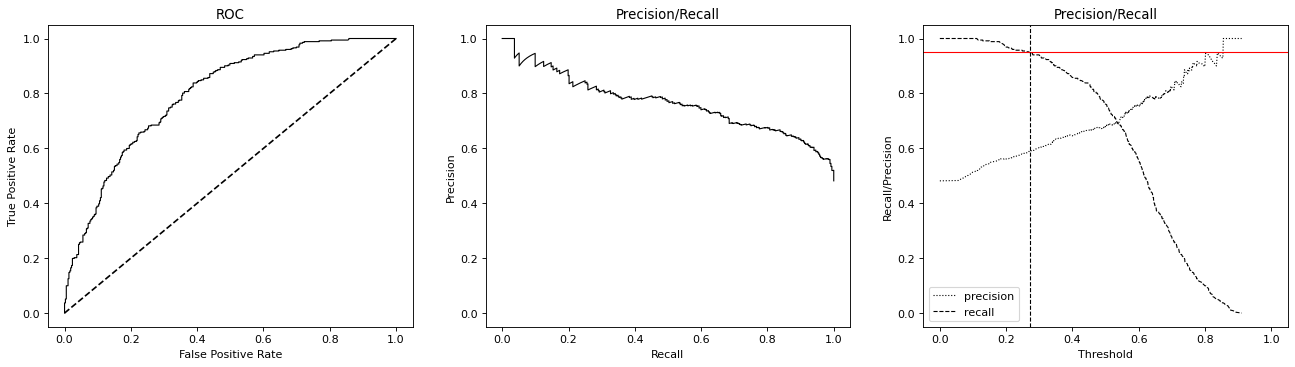

In [23]:
min_threshold, specificity = model_evaluation(y_round_up_bag_train_2, y_bag_validation_pred)

In [24]:
pd.DataFrame(confusion_matrix(y_round_up_bag_train_2, y_bag_validation_pred.iloc[:, 1]>min_threshold), columns=['PRED_FALSE', 'PRED_TRUE'], index=['ACTUAL_FALSE', 'ACTUAL_TRUE'])

,PRED_FALSE,PRED_TRUE
ACTUAL_FALSE,145,234
ACTUAL_TRUE,18,334


## modAL implementation: Uncertainty Sampling

In [29]:
from modAL.models import ActiveLearner
from modAL.uncertainty import uncertainty_sampling

# Fit model
learner = ActiveLearner(
    estimator=RandomForestClassifier(),
    query_strategy=uncertainty_sampling,
    X_training=bags_train_std_miles, y_training=y_round_up_bag_train_1
)

In [30]:
y_bag_validation_pred = pd.DataFrame(learner.predict_proba(bags_validation_std_miles))

AUC = 0.7843570100743584
Recall of 95.00 % reached on 0.280 threshold. This equals a 40.897  % precision


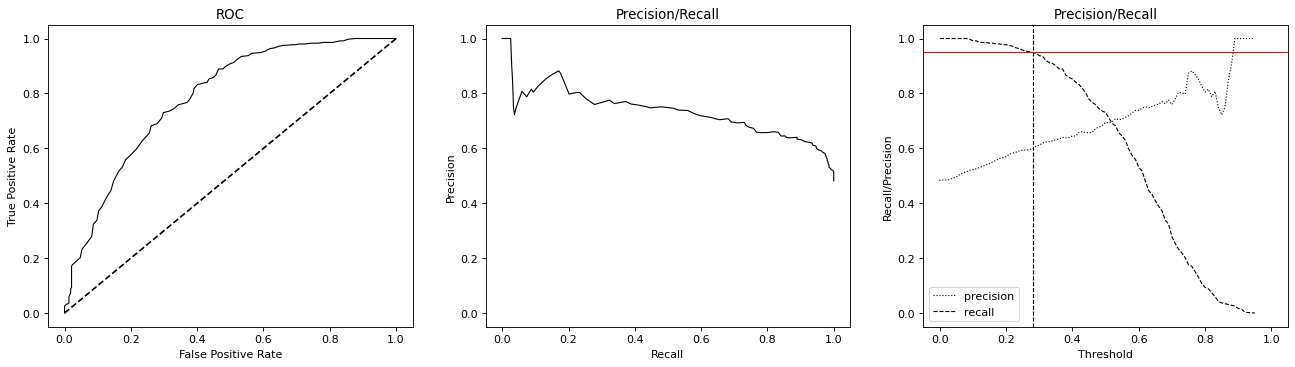

In [31]:
min_threshold, specificity = model_evaluation(y_round_up_bag_train_2, y_bag_validation_pred)

### Active Learning loop

  5%|████▏                                                                              | 1/20 [00:13<04:10, 13.19s/it]

AUC = 0.8066589595375723
Recall of 95.00 % reached on 0.270 threshold. This equals a 40.267  % precision


 10%|████████▎                                                                          | 2/20 [00:26<04:01, 13.39s/it]

AUC = 0.7973997146028222
Recall of 95.00 % reached on 0.270 threshold. This equals a 42.049  % precision


 15%|████████████▍                                                                      | 3/20 [00:40<03:47, 13.40s/it]

AUC = 0.8153864970645793
Recall of 95.00 % reached on 0.260 threshold. This equals a 41.644  % precision


 20%|████████████████▌                                                                  | 4/20 [00:53<03:35, 13.48s/it]

AUC = 0.8140057080500294
Recall of 95.00 % reached on 0.250 threshold. This equals a 40.997  % precision


 25%|████████████████████▊                                                              | 5/20 [01:07<03:24, 13.61s/it]

AUC = 0.8103646418387627
Recall of 95.00 % reached on 0.270 threshold. This equals a 43.662  % precision


 30%|████████████████████████▉                                                          | 6/20 [01:21<03:12, 13.77s/it]

AUC = 0.8173624964377316
Recall of 95.00 % reached on 0.250 threshold. This equals a 42.045  % precision


 35%|█████████████████████████████                                                      | 7/20 [01:35<02:59, 13.80s/it]

AUC = 0.8153161837611546
Recall of 95.00 % reached on 0.260 threshold. This equals a 42.529  % precision


 40%|█████████████████████████████████▏                                                 | 8/20 [01:49<02:47, 13.97s/it]

AUC = 0.8172419992808343
Recall of 95.00 % reached on 0.240 threshold. This equals a 38.889  % precision


 45%|█████████████████████████████████████▎                                             | 9/20 [02:03<02:34, 14.00s/it]

AUC = 0.8137930024028601
Recall of 95.00 % reached on 0.230 threshold. This equals a 38.348  % precision
AUC = 0.8265883420734167
Recall of 95.00 % reached on 0.250 threshold. This equals a 41.791  % precision


 55%|█████████████████████████████████████████████                                     | 11/20 [02:32<02:07, 14.11s/it]

AUC = 0.8306303868093433
Recall of 95.00 % reached on 0.260 threshold. This equals a 44.073  % precision


 60%|█████████████████████████████████████████████████▏                                | 12/20 [02:46<01:54, 14.26s/it]

AUC = 0.8331845077998924
Recall of 95.00 % reached on 0.250 threshold. This equals a 42.462  % precision


 65%|█████████████████████████████████████████████████████▎                            | 13/20 [03:01<01:40, 14.41s/it]

AUC = 0.8301902536715621
Recall of 95.00 % reached on 0.280 threshold. This equals a 47.352  % precision


 70%|█████████████████████████████████████████████████████████▍                        | 14/20 [03:17<01:28, 14.80s/it]

AUC = 0.8346823334636344
Recall of 95.00 % reached on 0.240 threshold. This equals a 44.904  % precision


 75%|█████████████████████████████████████████████████████████████▌                    | 15/20 [03:33<01:15, 15.04s/it]

AUC = 0.840643170336479
Recall of 95.00 % reached on 0.240 threshold. This equals a 46.154  % precision


 80%|█████████████████████████████████████████████████████████████████▌                | 16/20 [03:48<01:00, 15.13s/it]

AUC = 0.8401502813147764
Recall of 95.00 % reached on 0.260 threshold. This equals a 48.860  % precision


 85%|█████████████████████████████████████████████████████████████████████▋            | 17/20 [04:03<00:45, 15.17s/it]

AUC = 0.8420568155667494
Recall of 95.00 % reached on 0.250 threshold. This equals a 46.358  % precision


 90%|█████████████████████████████████████████████████████████████████████████▊        | 18/20 [04:19<00:30, 15.31s/it]

AUC = 0.8504448871181938
Recall of 95.00 % reached on 0.240 threshold. This equals a 46.000  % precision


 95%|█████████████████████████████████████████████████████████████████████████████▉    | 19/20 [04:34<00:15, 15.31s/it]

AUC = 0.8515758679693106
Recall of 95.00 % reached on 0.240 threshold. This equals a 44.781  % precision


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [04:50<00:00, 14.50s/it]

AUC = 0.8558809189204691
Recall of 95.00 % reached on 0.220 threshold. This equals a 44.369  % precision


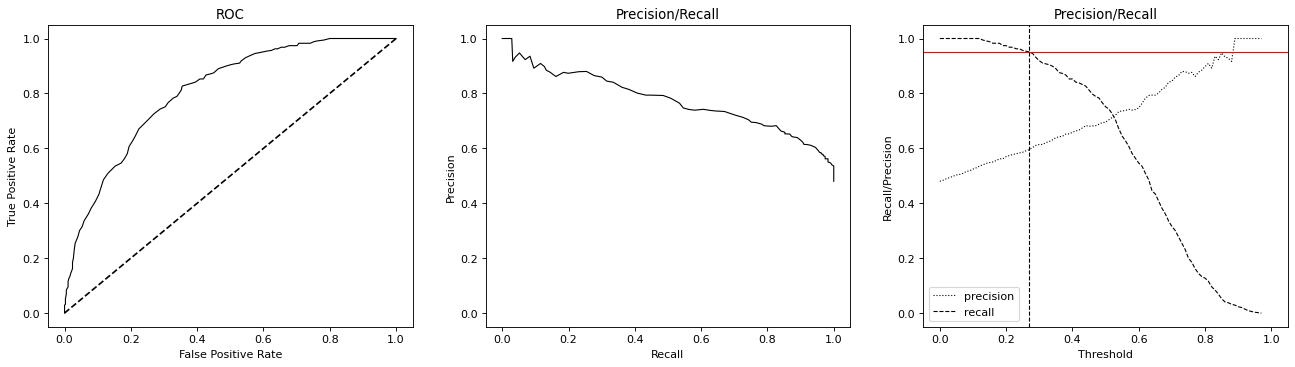

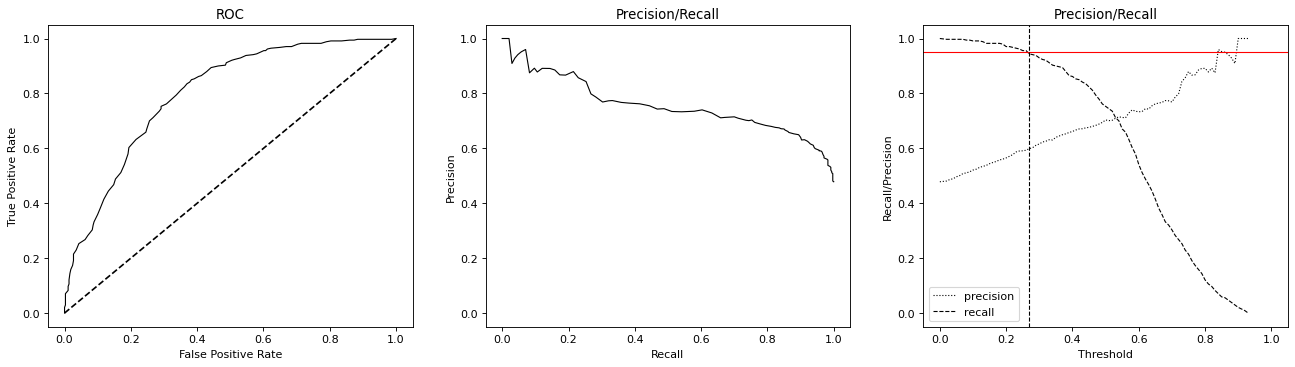

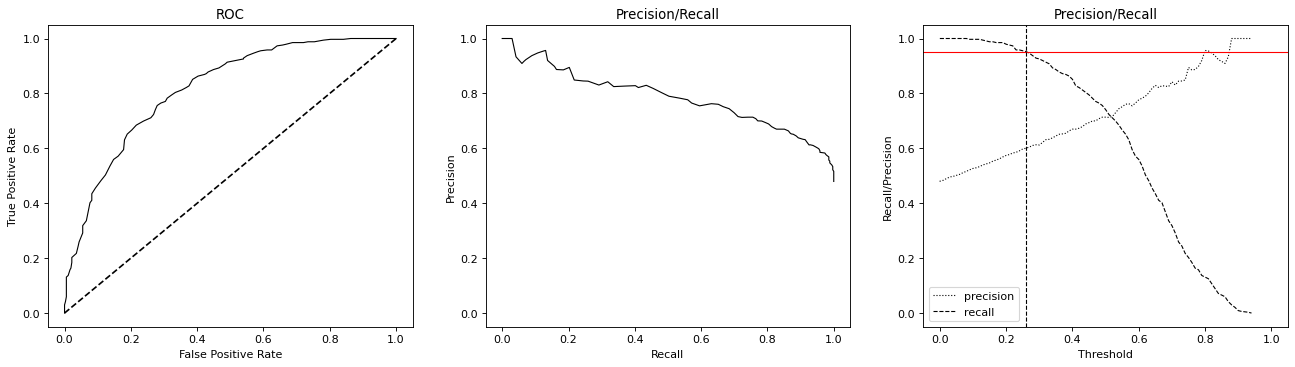

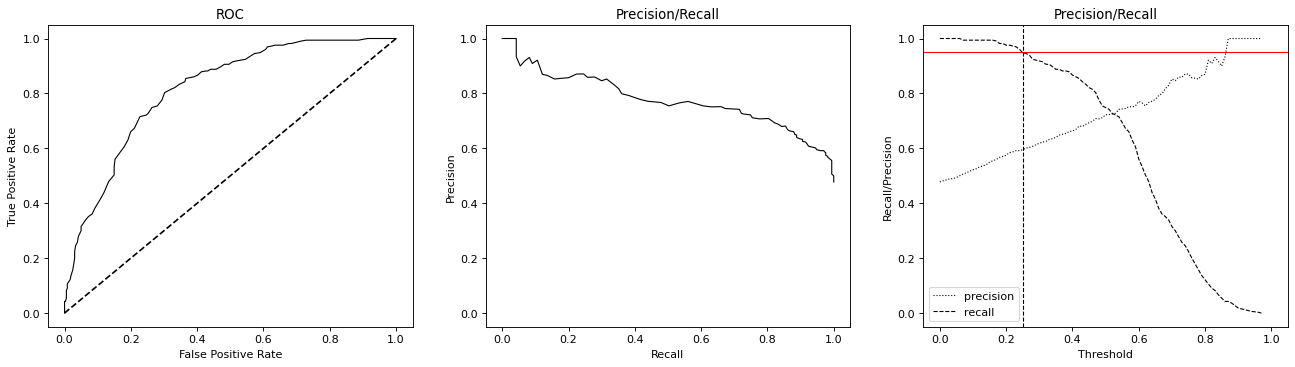

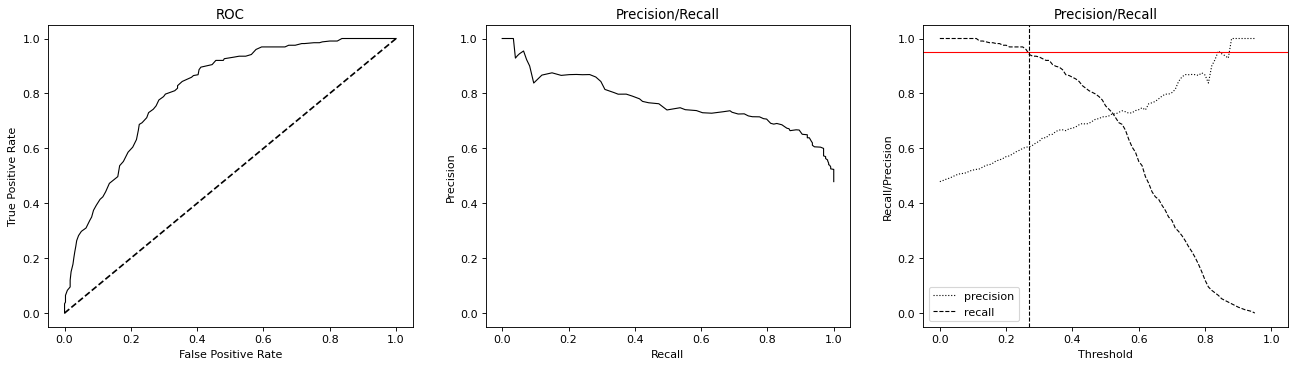

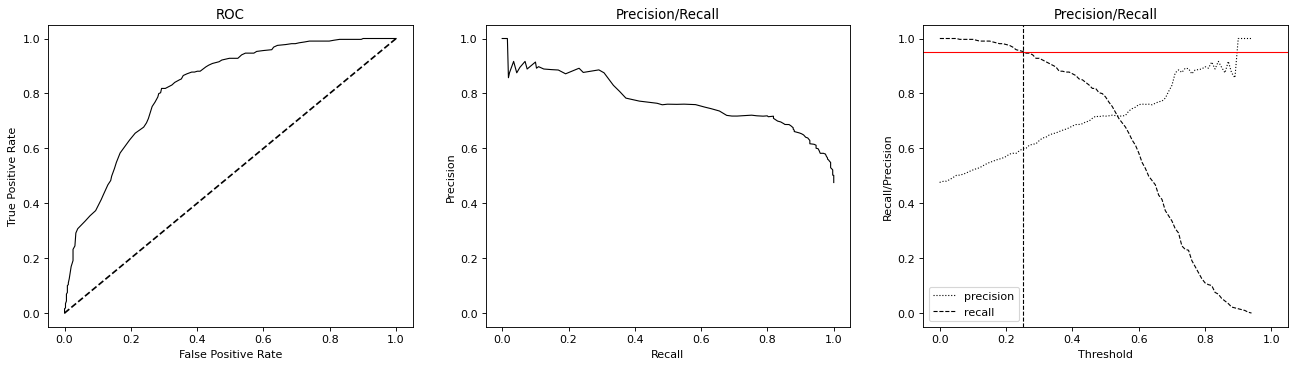

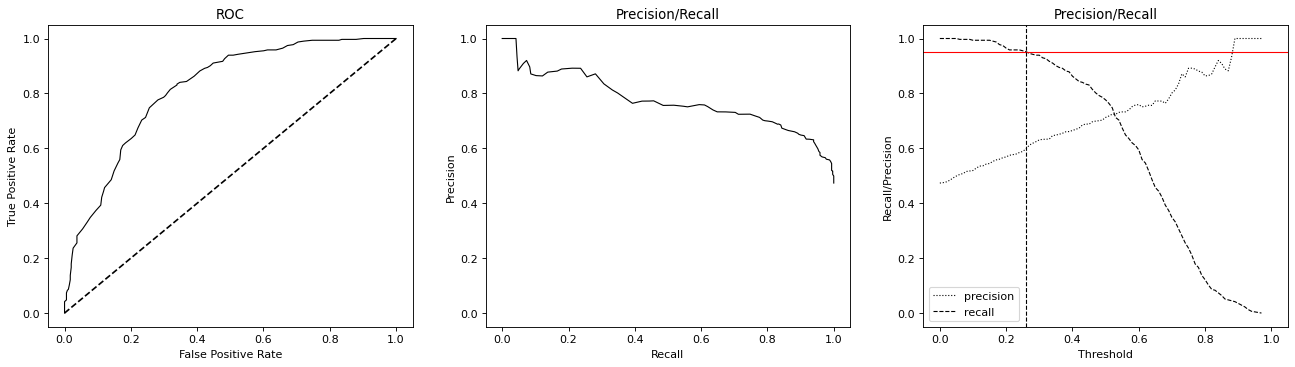

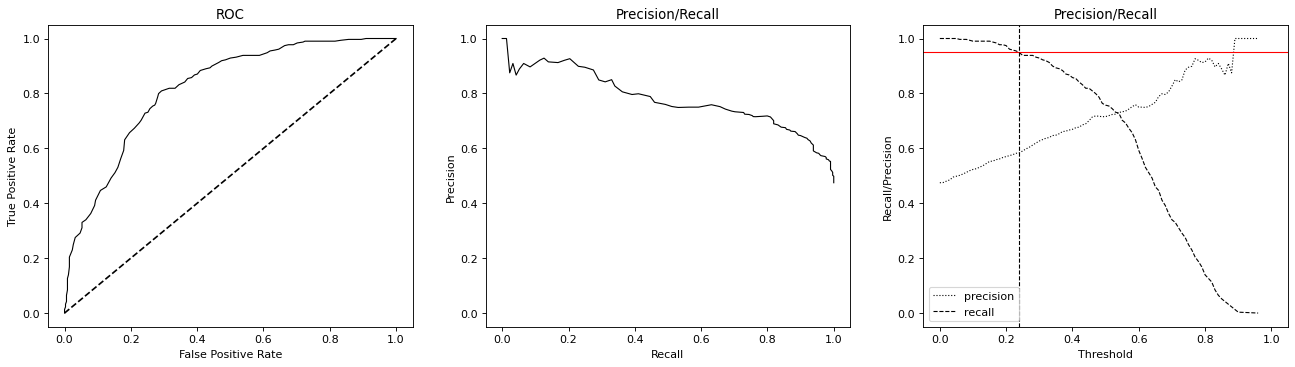

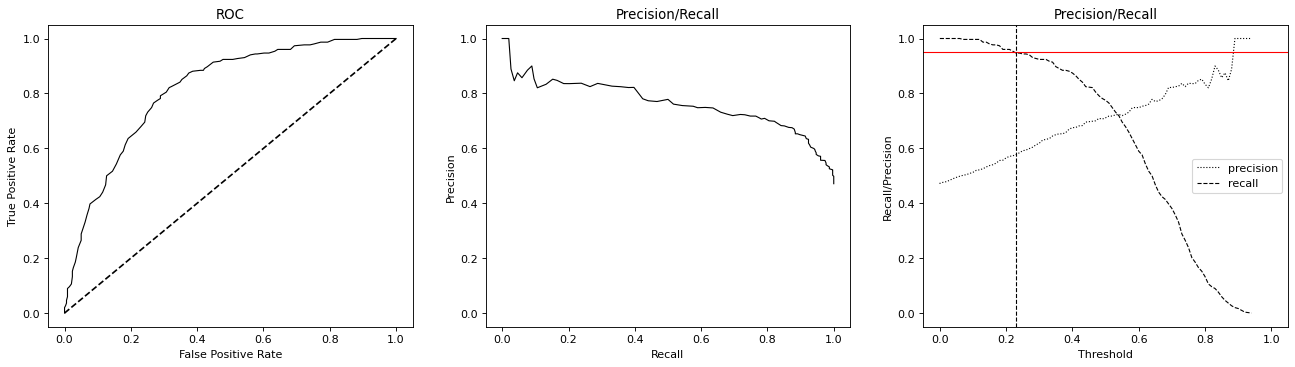

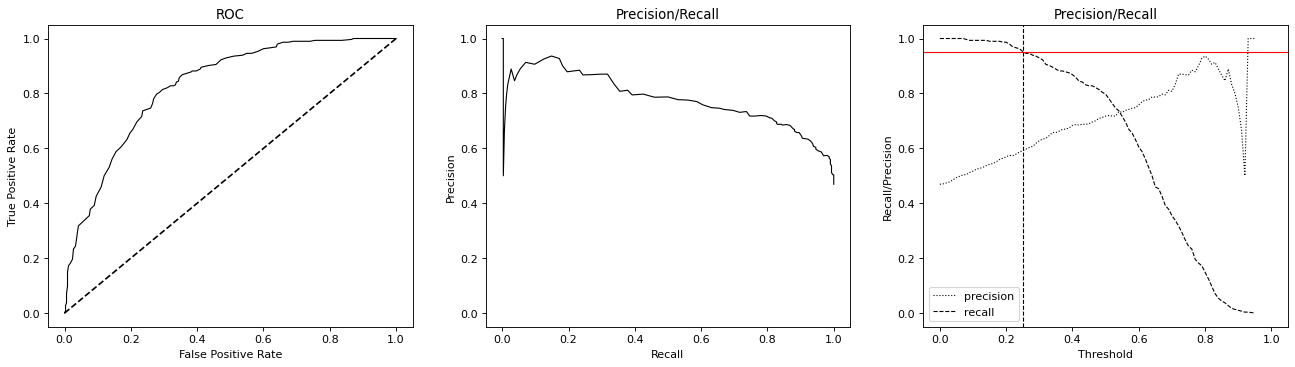

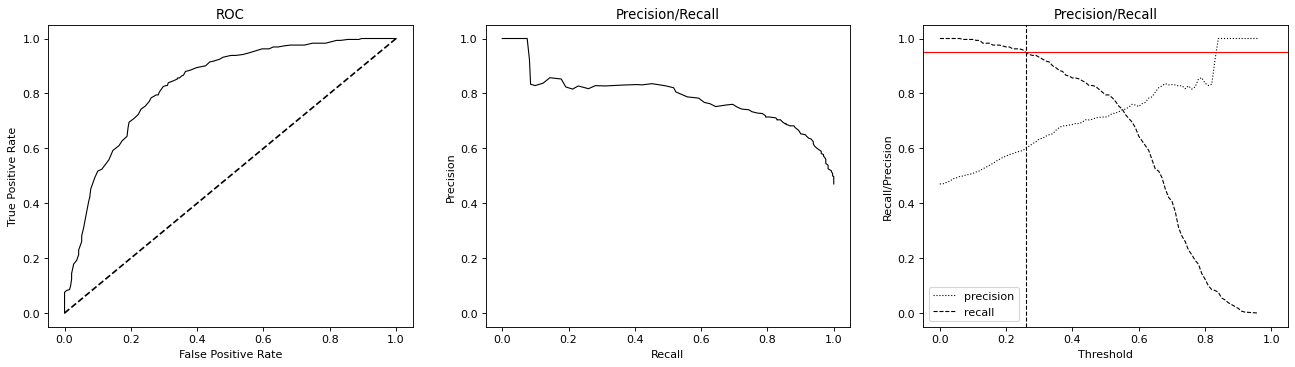

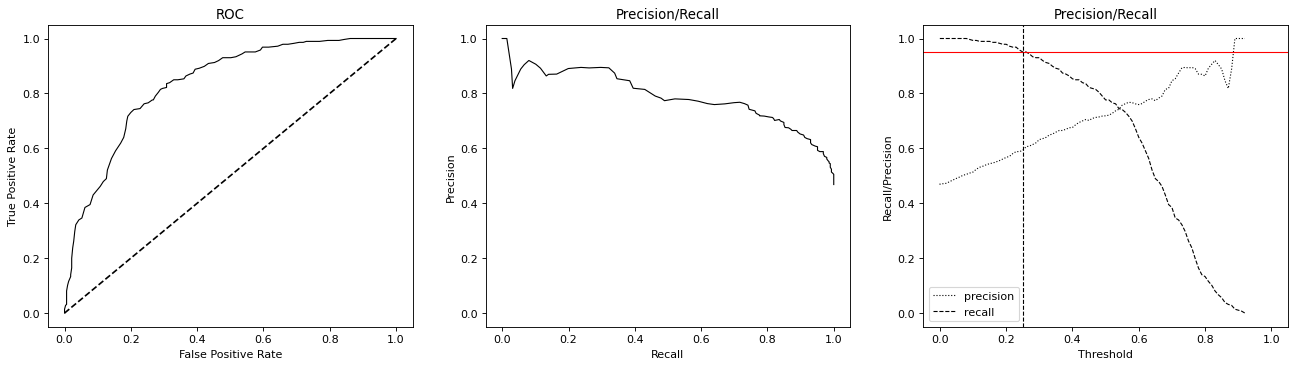

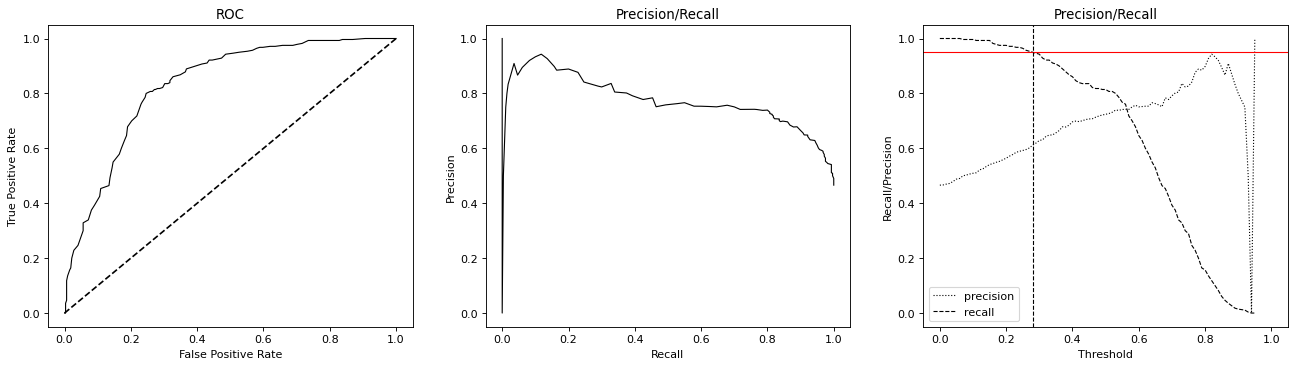

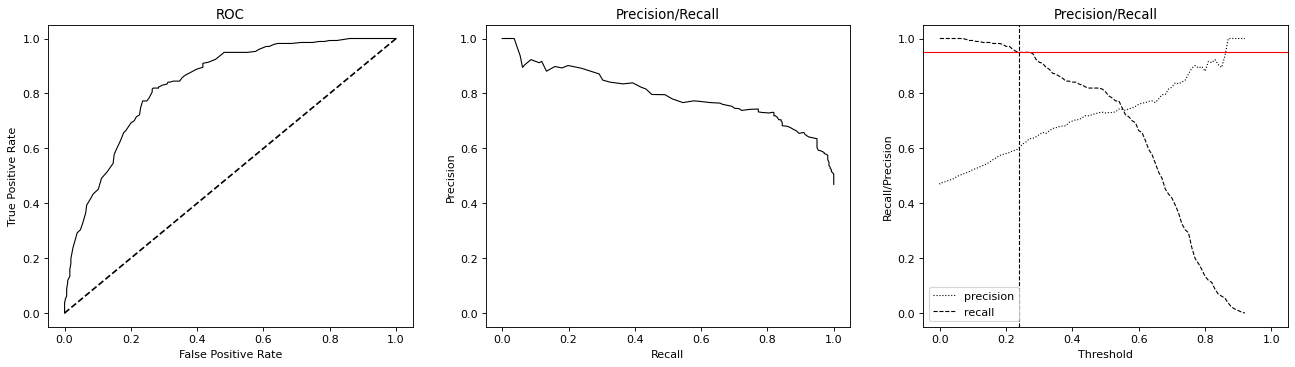

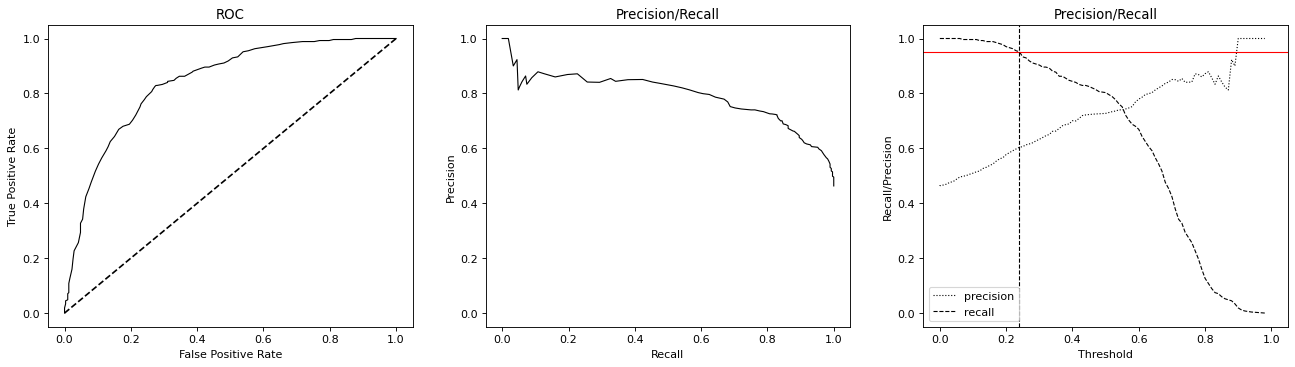

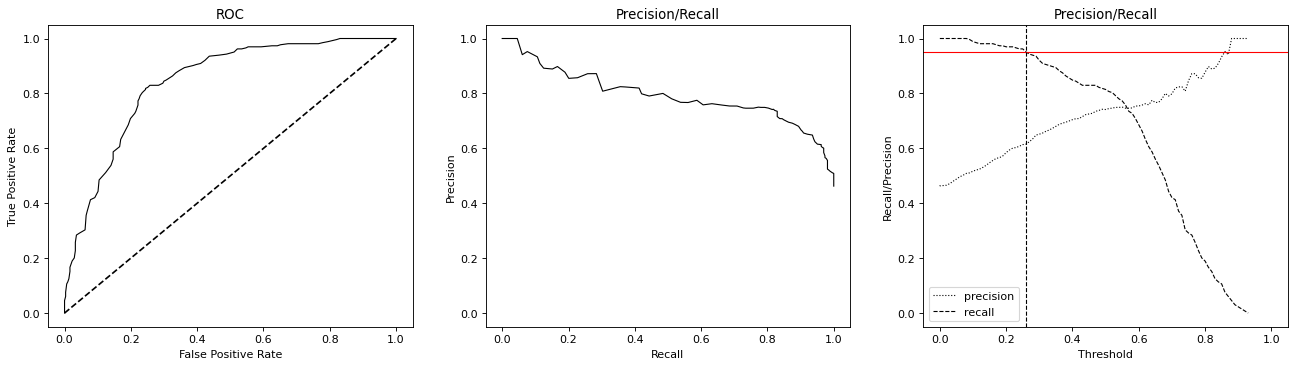

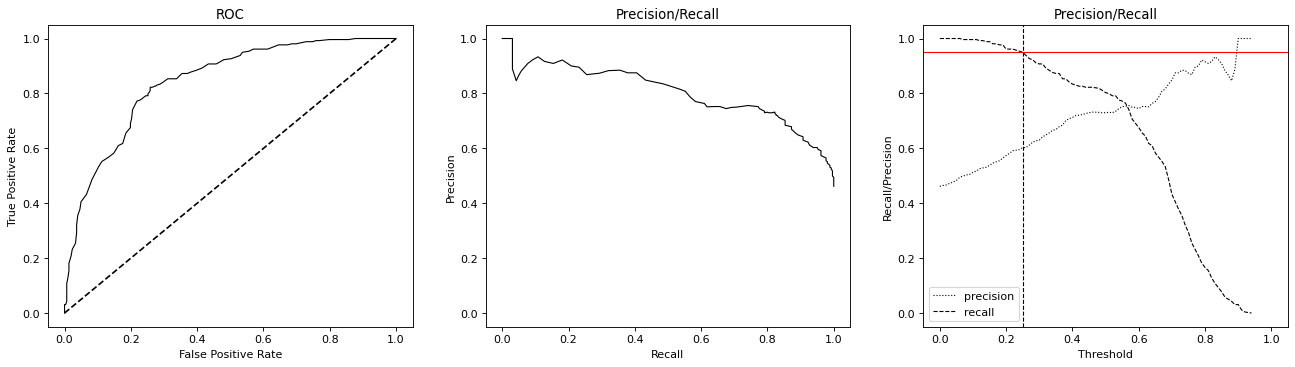

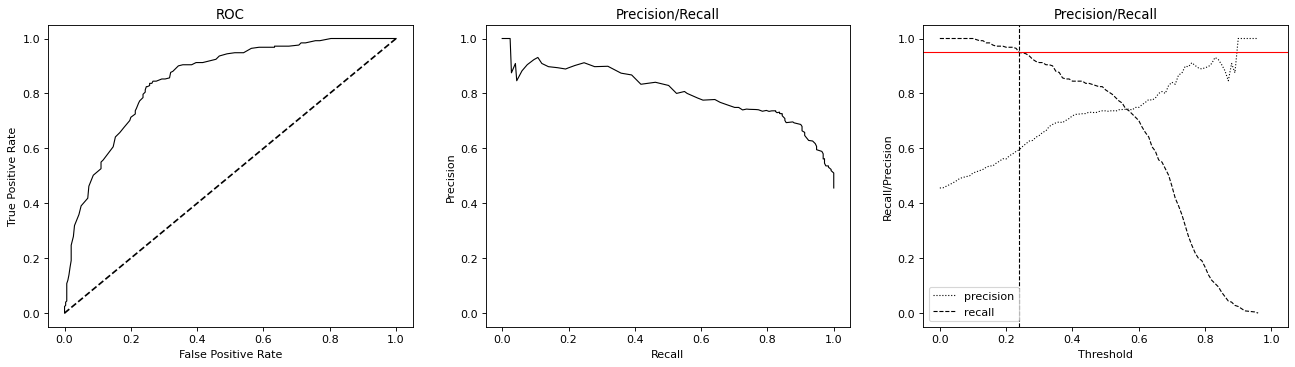

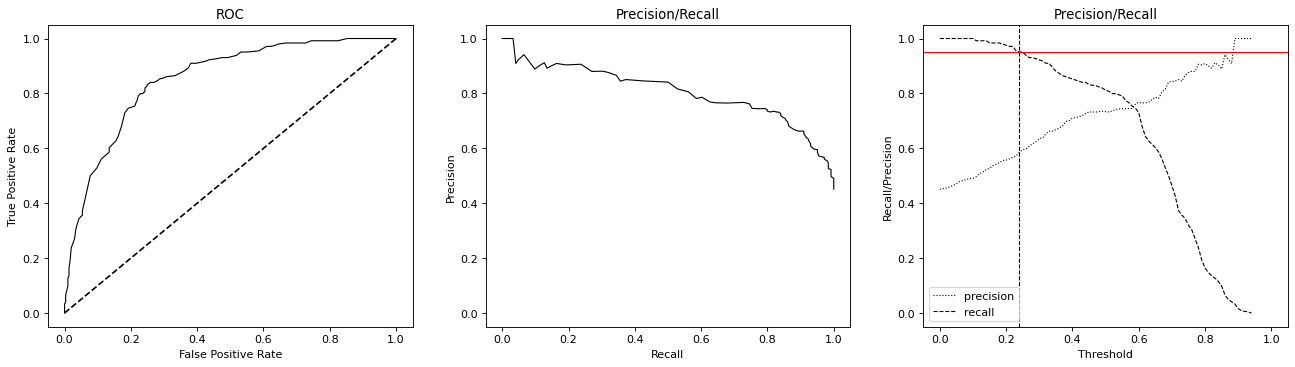

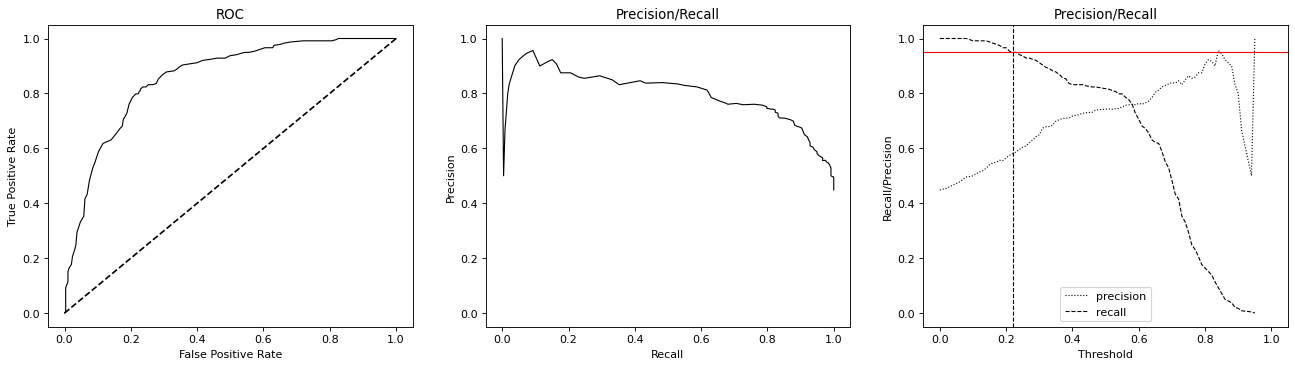

In [33]:
moved_invoices = 200
step_size = 10

scores = []
extra_learned = []

for i in tqdm(range(0, int(moved_invoices/step_size))):
    
    most_valuable_instances = learner.query(bags_validation_std_miles, n_instances=step_size)
    extra_learned += most_valuable_instances[0].tolist()
    
    learner.teach(most_valuable_instances[1], y_round_up_bag_train_2[most_valuable_instances[0]])
    
    # Predict on validation set
    y_bag_validation_pred = pd.DataFrame(learner.predict_proba(np.delete(bags_validation_std_miles, extra_learned, axis=0)))
    # Evaluate prediction
    min_threshold, specificity = model_evaluation(np.delete(y_round_up_bag_train_2, extra_learned, axis=0), y_bag_validation_pred)

    scores += [[min_threshold, specificity]]

AttributeError: 'list' object has no attribute 'set_xticks'

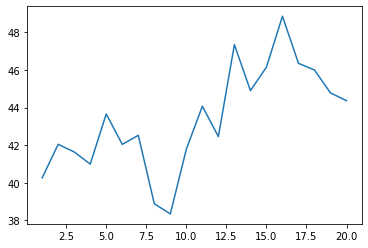

In [49]:
specificity_evolution_uncertainty = [i[1] for i in scores]

ax = plt.plot(np.arange(1,21), specificity_evolution_uncertainty)

## modAL implementation: Query by Committee

In [75]:
from modAL.models import ActiveLearner, Committee

X_pool = bags_train_std_miles
y_pool = y_round_up_bag_train_1

# initializing Committee members
n_members = 2
learner_list = list()

for member_idx in range(n_members):
    # initial training data
    n_initial = 500
    train_idx = np.random.choice(range(X_pool.shape[0]), size=n_initial, replace=False)
    X_train = X_pool[train_idx]
    y_train = y_pool[train_idx]

    # creating a reduced copy of the data with the known instances removed
    X_pool = np.delete(X_pool, train_idx, axis=0)
    y_pool = np.delete(y_pool, train_idx)

    # initializing learner
    learner = ActiveLearner(
        estimator=RandomForestClassifier(),
        X_training=X_train, y_training=y_train
    )
    learner_list.append(learner)

# assembling the committee
committee = Committee(learner_list=learner_list)

AUC = 0.7829890261453587
Recall of 95.00 % reached on 0.250 threshold. This equals a 33.245  % precision


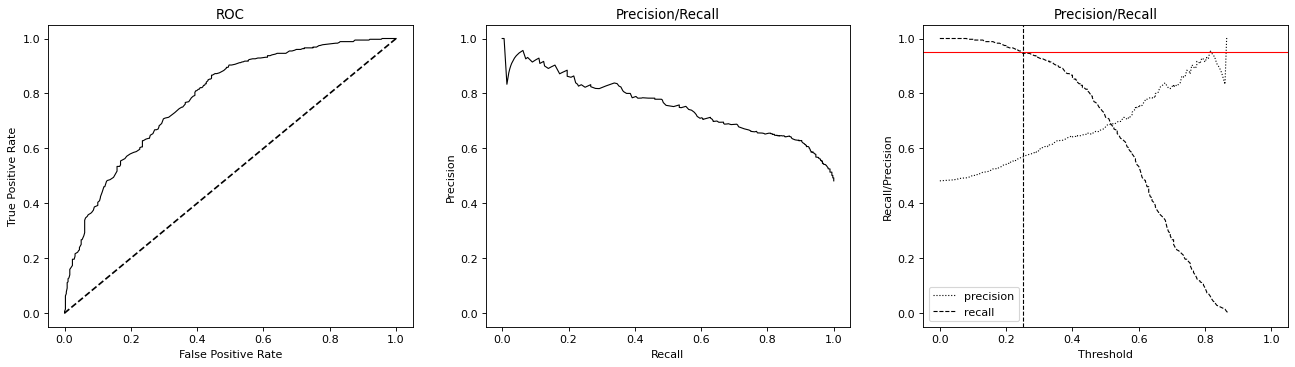

In [76]:
y_bag_validation_pred = pd.DataFrame(committee.predict_proba(bags_validation_std_miles))

min_threshold, specificity = model_evaluation(y_round_up_bag_train_2, y_bag_validation_pred)

### Active Learning loop

In [77]:
performance_history  = [specificity]

AUC = 0.7783828556008635
Recall of 95.00 % reached on 0.260 threshold. This equals a 31.135  % precision
AUC = 0.78125
Recall of 95.00 % reached on 0.250 threshold. This equals a 31.135  % precision
AUC = 0.776711291676661
Recall of 95.00 % reached on 0.270 threshold. This equals a 32.454  % precision
AUC = 0.7789637802830416
Recall of 95.00 % reached on 0.280 threshold. This equals a 33.245  % precision
AUC = 0.780174352362677
Recall of 95.00 % reached on 0.295 threshold. This equals a 36.412  % precision
AUC = 0.7792823518829456
Recall of 95.00 % reached on 0.275 threshold. This equals a 32.454  % precision
AUC = 0.7832963540417366
Recall of 95.00 % reached on 0.265 threshold. This equals a 31.662  % precision
AUC = 0.7829215639242024
Recall of 95.00 % reached on 0.295 threshold. This equals a 34.828  % precision
AUC = 0.7770598464859679
Recall of 95.00 % reached on 0.285 threshold. This equals a 34.301  % precision
AUC = 0.7798895118733509
Recall of 95.00 % reached on 0.265 threshol

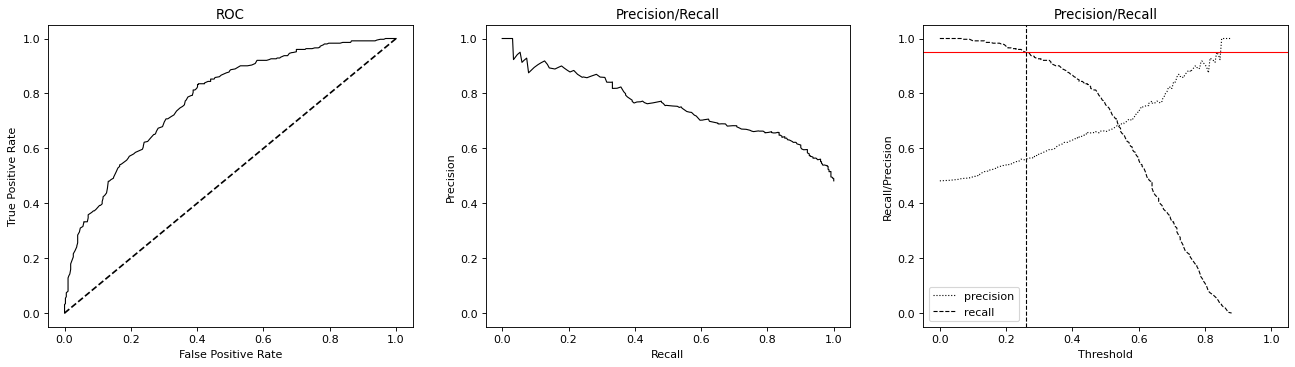

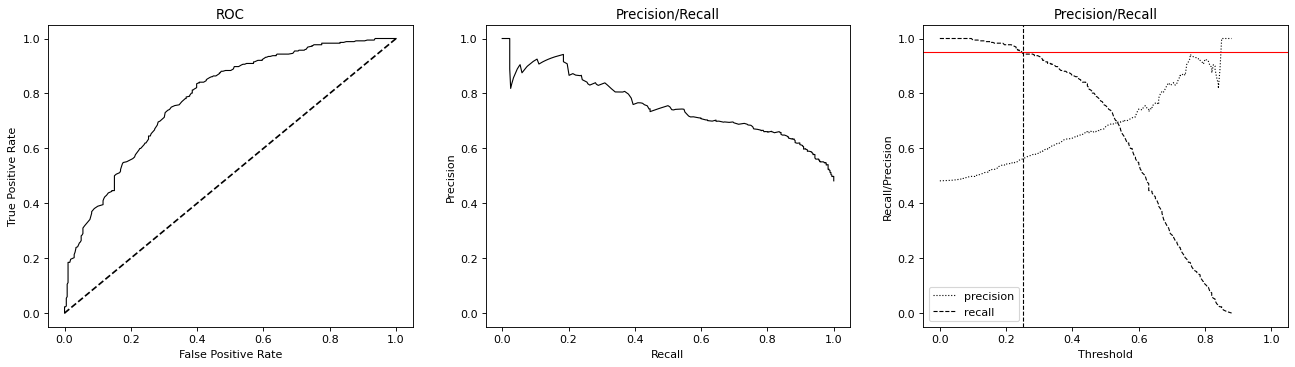

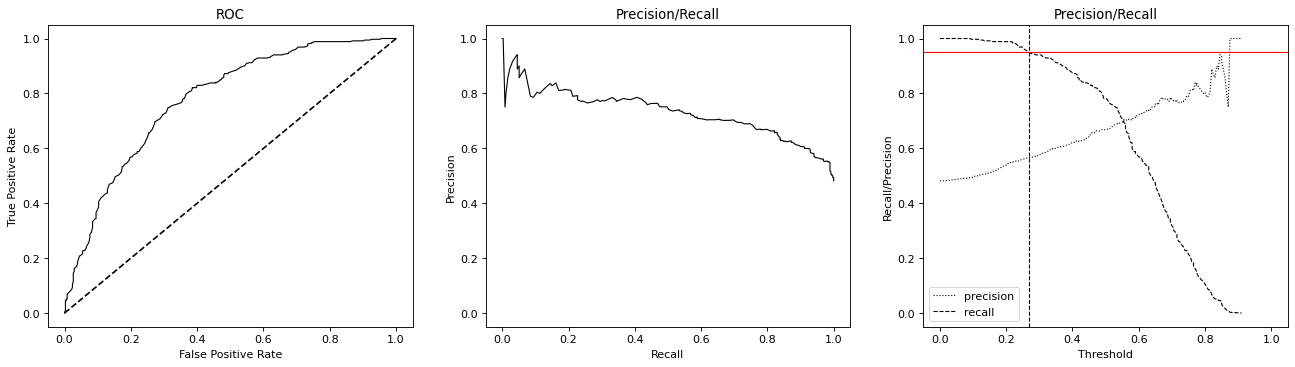

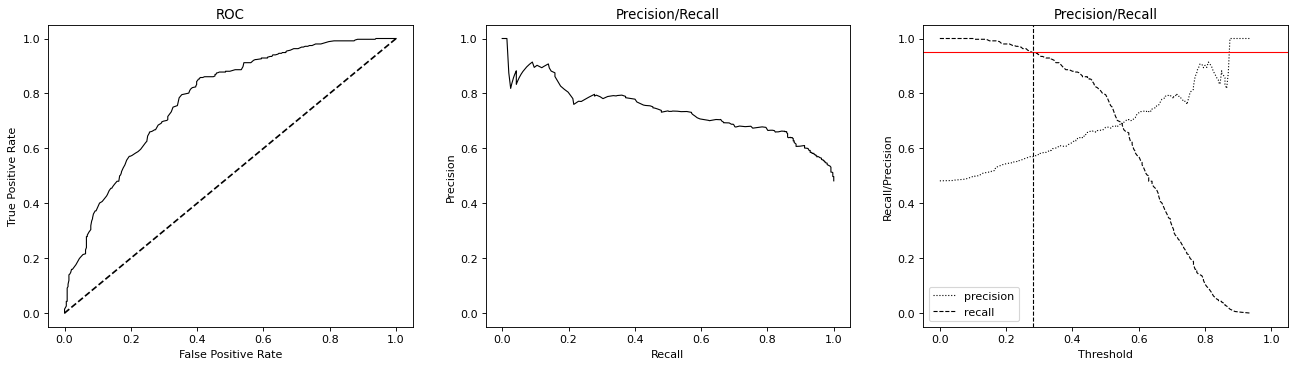

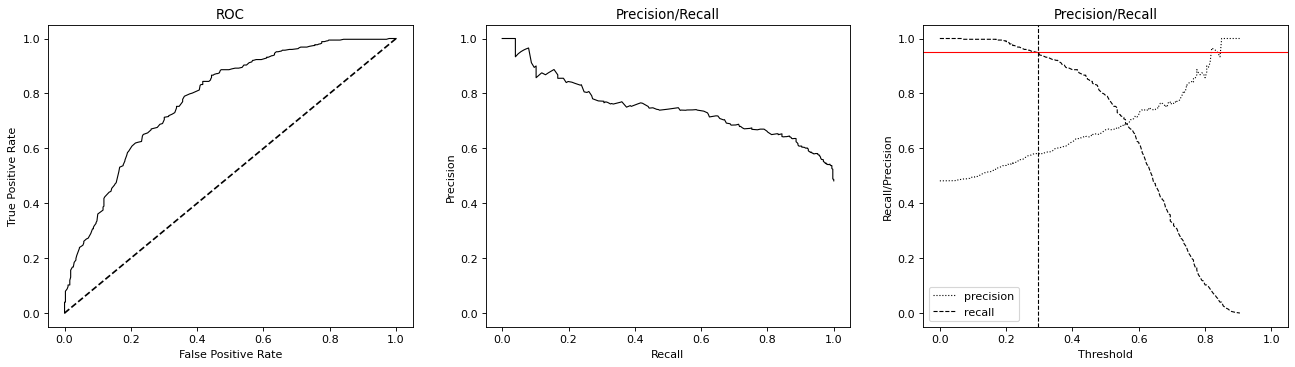

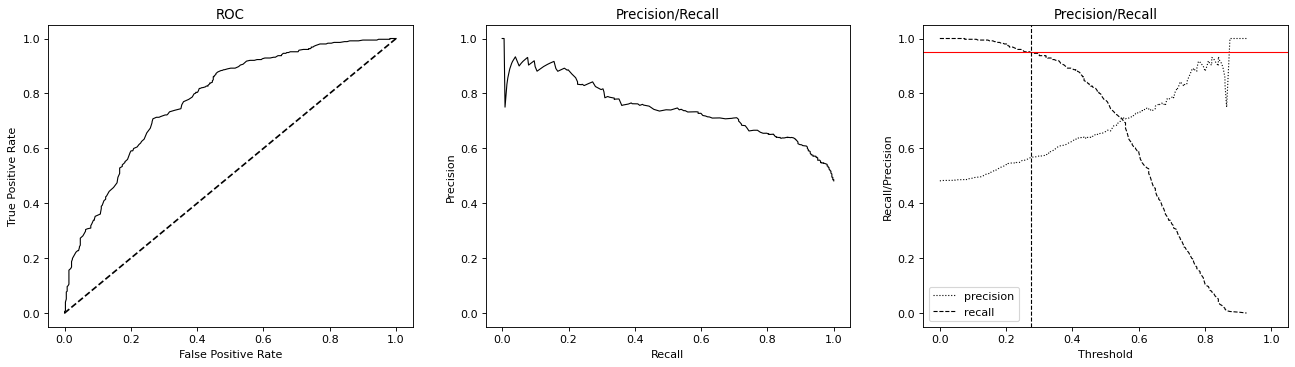

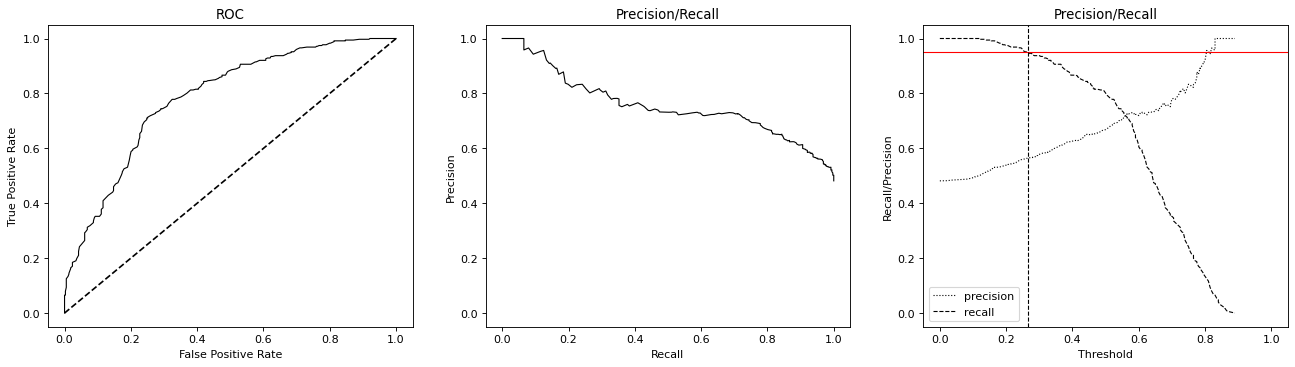

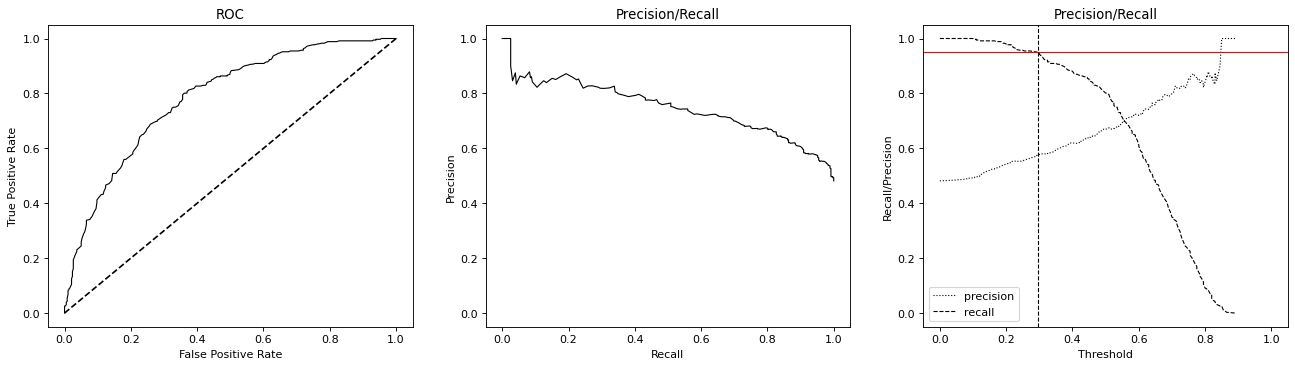

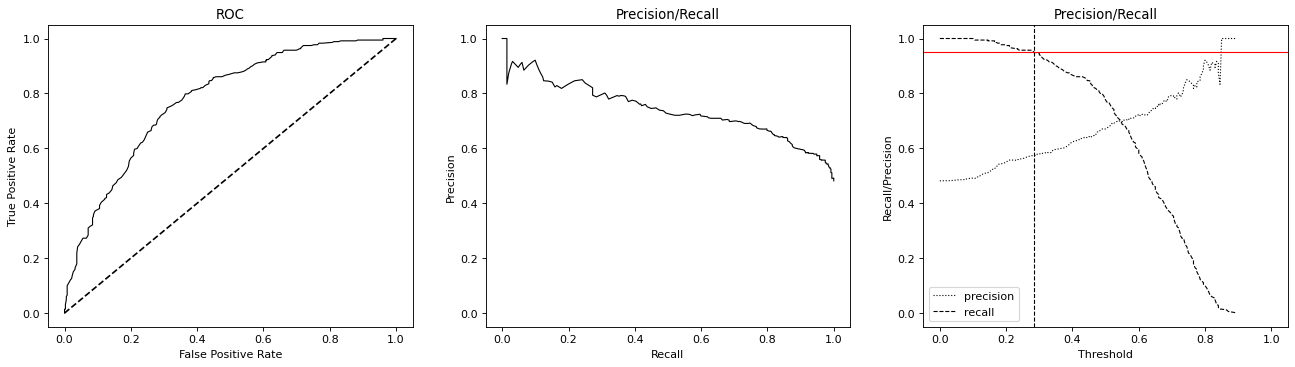

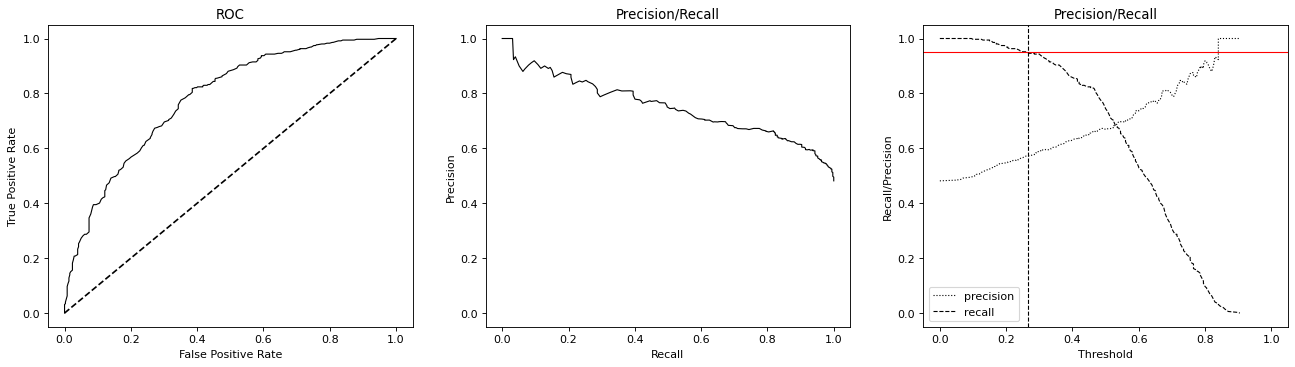

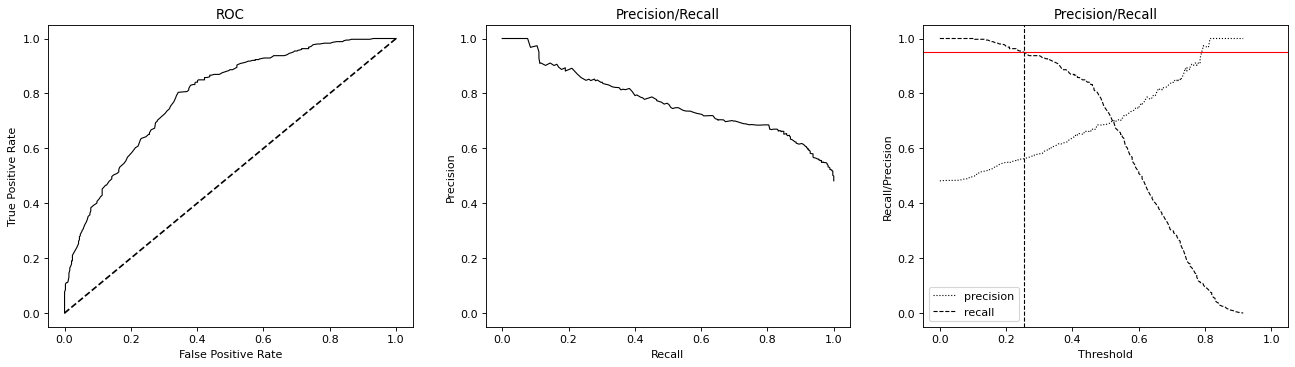

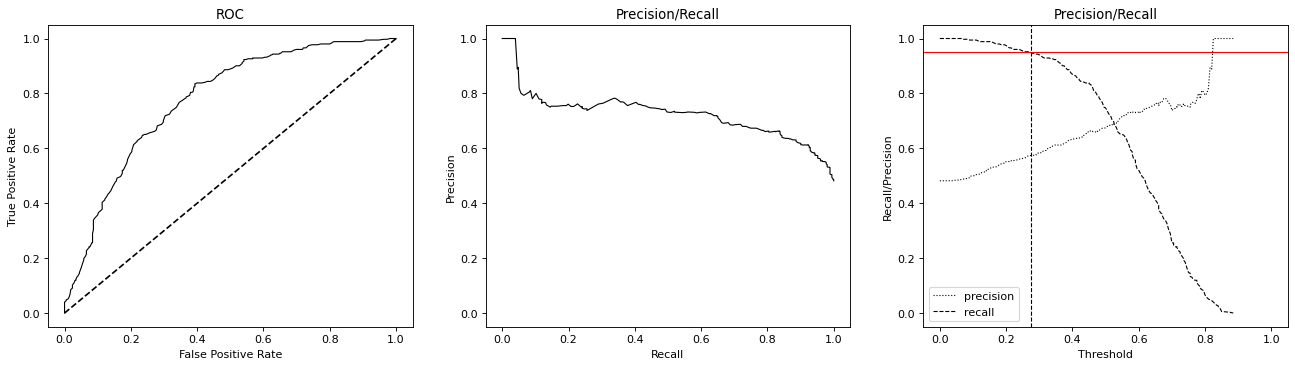

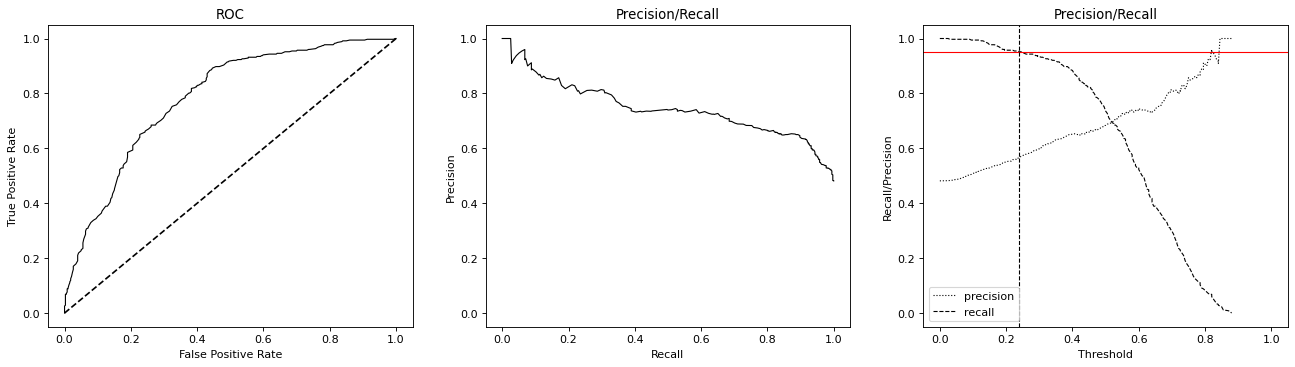

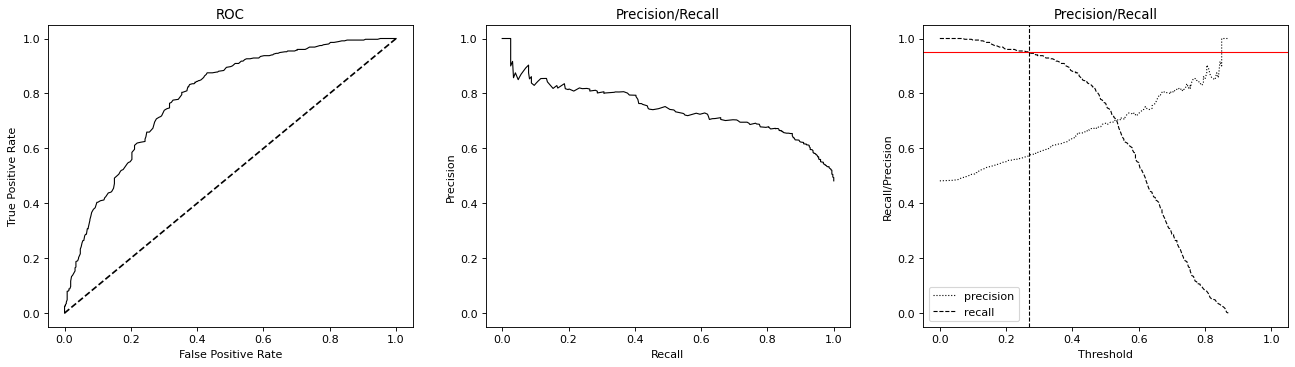

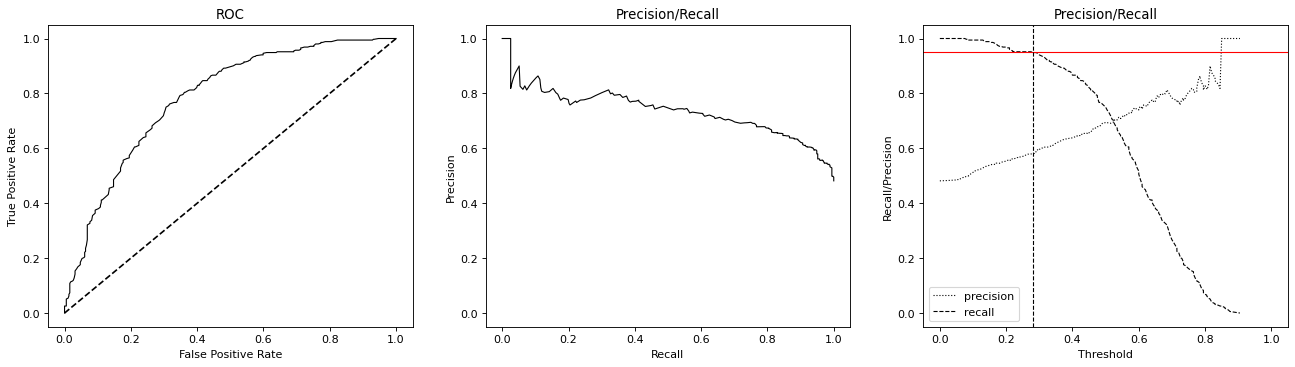

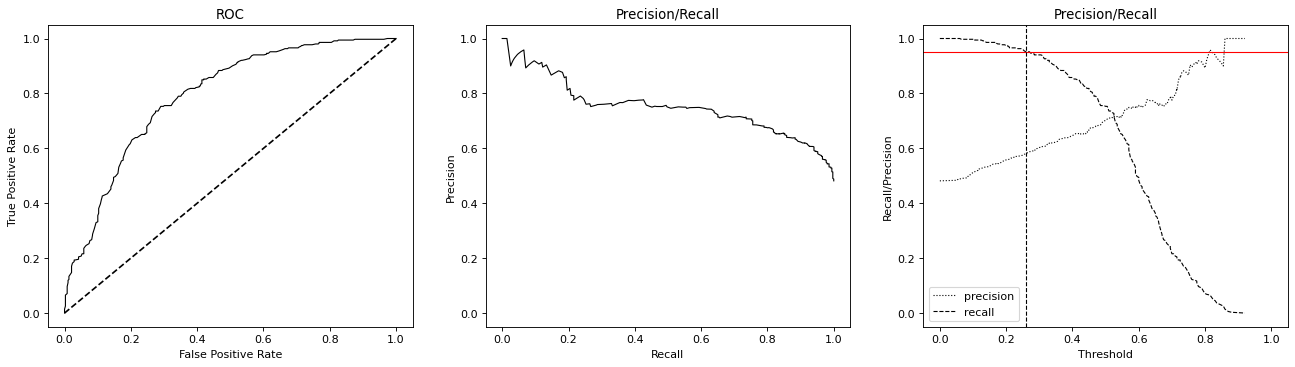

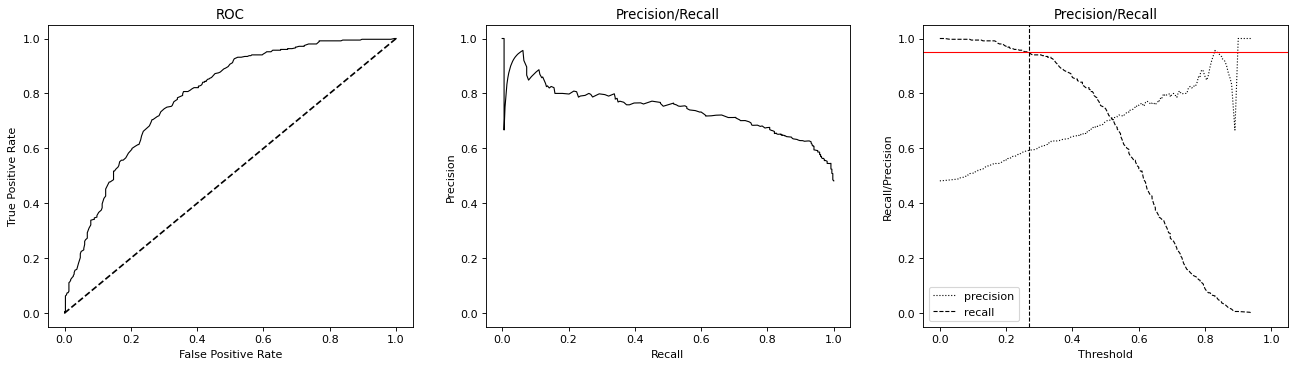

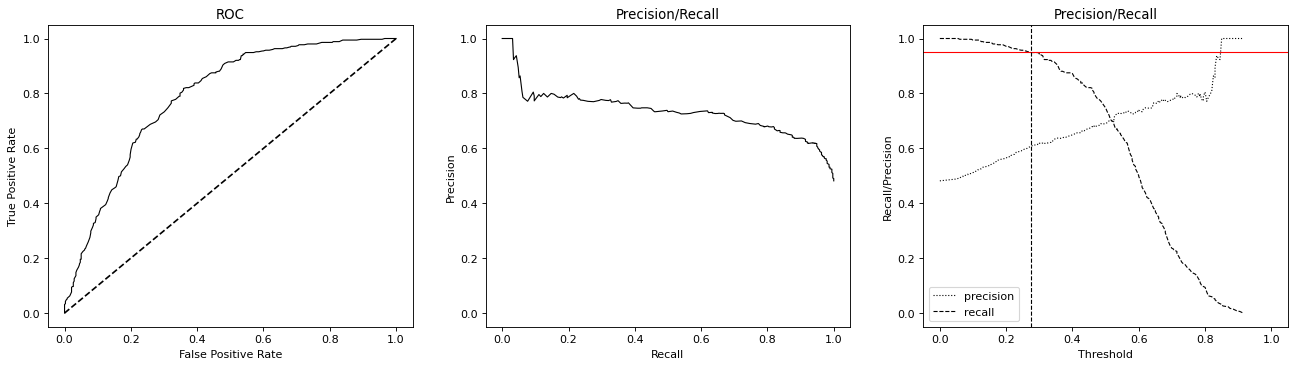

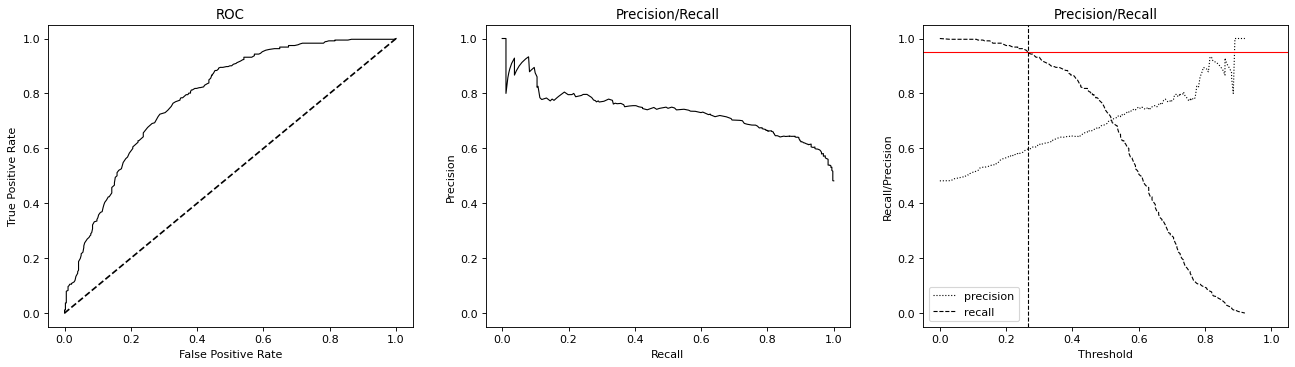

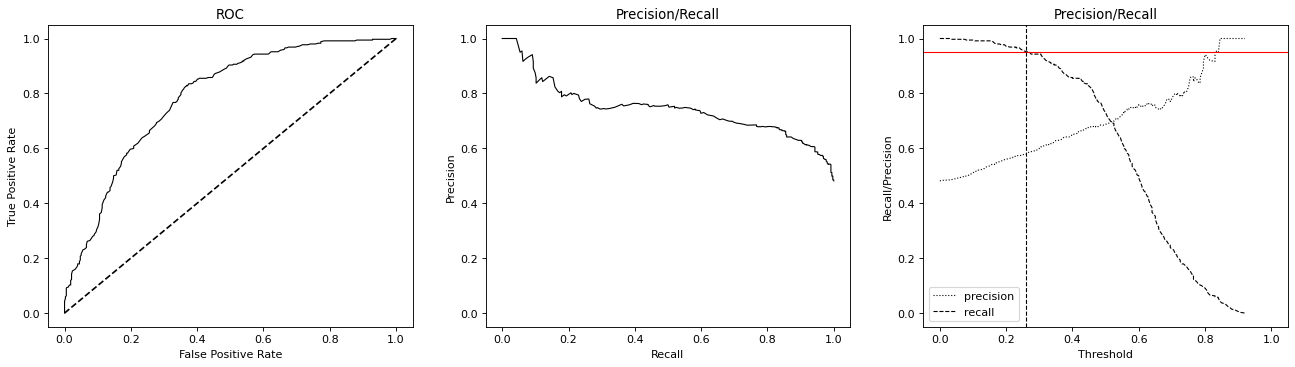

In [80]:
# query by committee
n_queries = 20
for idx in range(n_queries):
    query_idx, query_instance = committee.query(X_pool, n_instances = 20)
    committee.teach(
        X=X_pool[query_idx],#.reshape(1, -1),
        y=y_pool[query_idx]#.reshape(1, )
    )
    
    # Evaluate
    y_bag_validation_pred = pd.DataFrame(committee.predict_proba(bags_validation_std_miles))
    min_threshold, specificity = model_evaluation(y_round_up_bag_train_2, y_bag_validation_pred)
    performance_history.append(specificity)
    
    # remove queried instance from pool
    X_pool = np.delete(X_pool, query_idx, axis=0)
    y_pool = np.delete(y_pool, query_idx)

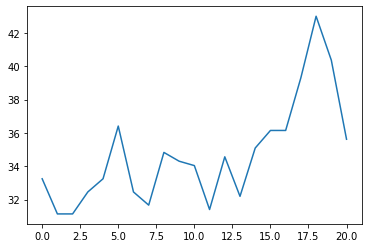

In [81]:
ax = plt.plot(np.arange(0,21), performance_history)

## Active Learning - Own attempt

  0%|                                                                                           | 0/20 [00:00<?, ?it/s]

10
1467
721


  5%|████▏                                                                              | 1/20 [00:11<03:40, 11.62s/it]

AUC = 0.7982246605742114
Recall of 95.00 % reached on 0.259 threshold. This equals a 37.968  % precision
10
1477
711


 10%|████████▎                                                                          | 2/20 [00:23<03:32, 11.78s/it]

AUC = 0.8011101602244092
Recall of 95.00 % reached on 0.265 threshold. This equals a 37.669  % precision
10
1487
701


 15%|████████████▍                                                                      | 3/20 [00:35<03:18, 11.69s/it]

AUC = 0.8033023483365949
Recall of 95.00 % reached on 0.251 threshold. This equals a 37.260  % precision
10
1497
691


 20%|████████████████▌                                                                  | 4/20 [00:47<03:10, 11.92s/it]

AUC = 0.803548365453966
Recall of 95.00 % reached on 0.244 threshold. This equals a 36.695  % precision
10
1507
681


 25%|████████████████████▊                                                              | 5/20 [00:59<02:58, 11.93s/it]

AUC = 0.8065144525648336
Recall of 95.00 % reached on 0.263 threshold. This equals a 39.548  % precision
10
1517
671


 30%|████████████████████████▉                                                          | 6/20 [01:11<02:47, 11.99s/it]

AUC = 0.8090520694259011
Recall of 95.00 % reached on 0.260 threshold. This equals a 40.286  % precision
10
1527
661


 35%|█████████████████████████████                                                      | 7/20 [01:23<02:35, 11.98s/it]

AUC = 0.8097367455512751
Recall of 95.00 % reached on 0.271 threshold. This equals a 42.899  % precision
10
1537
651


 40%|█████████████████████████████████▏                                                 | 8/20 [01:35<02:24, 12.06s/it]

AUC = 0.8130887081520712
Recall of 95.00 % reached on 0.264 threshold. This equals a 41.765  % precision
10
1547
641


 45%|█████████████████████████████████████▎                                             | 9/20 [01:48<02:15, 12.28s/it]

AUC = 0.8174293300015619
Recall of 95.00 % reached on 0.248 threshold. This equals a 37.389  % precision
10
1557
631


 50%|█████████████████████████████████████████                                         | 10/20 [02:00<02:02, 12.29s/it]

AUC = 0.8155337361530715
Recall of 95.00 % reached on 0.250 threshold. This equals a 38.671  % precision
10
1567
621


 55%|█████████████████████████████████████████████                                     | 11/20 [02:12<01:50, 12.30s/it]

AUC = 0.815945945945946
Recall of 95.00 % reached on 0.255 threshold. This equals a 39.077  % precision
10
1577
611


 60%|█████████████████████████████████████████████████▏                                | 12/20 [02:25<01:38, 12.28s/it]

AUC = 0.8221667203781287
Recall of 95.00 % reached on 0.254 threshold. This equals a 39.875  % precision
10
1587
601


 65%|█████████████████████████████████████████████████████▎                            | 13/20 [02:37<01:26, 12.34s/it]

AUC = 0.8197857697857698
Recall of 95.00 % reached on 0.252 threshold. This equals a 38.730  % precision
10
1597
591


 70%|█████████████████████████████████████████████████████████▍                        | 14/20 [02:50<01:15, 12.54s/it]

AUC = 0.8278535197043769
Recall of 95.00 % reached on 0.244 threshold. This equals a 40.129  % precision
10
1607
581


 75%|█████████████████████████████████████████████████████████████▌                    | 15/20 [03:03<01:03, 12.67s/it]

AUC = 0.8293444452358906
Recall of 95.00 % reached on 0.245 threshold. This equals a 42.574  % precision
10
1617
571


 80%|█████████████████████████████████████████████████████████████████▌                | 16/20 [03:16<00:50, 12.67s/it]

AUC = 0.8320921243752923
Recall of 95.00 % reached on 0.237 threshold. This equals a 41.391  % precision
10
1627
561


 85%|█████████████████████████████████████████████████████████████████████▋            | 17/20 [03:28<00:37, 12.63s/it]

AUC = 0.8371861858034917
Recall of 95.00 % reached on 0.246 threshold. This equals a 43.729  % precision
10
1637
551


 90%|█████████████████████████████████████████████████████████████████████████▊        | 18/20 [03:42<00:25, 12.79s/it]

AUC = 0.8371200105736188
Recall of 95.00 % reached on 0.245 threshold. This equals a 44.330  % precision
10
1647
541


 95%|█████████████████████████████████████████████████████████████████████████████▉    | 19/20 [03:55<00:12, 12.89s/it]

AUC = 0.8437139561707035
Recall of 95.00 % reached on 0.235 threshold. This equals a 41.869  % precision
10
1657
531


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [04:08<00:00, 12.42s/it]

AUC = 0.8495004995004994
Recall of 95.00 % reached on 0.255 threshold. This equals a 46.154  % precision


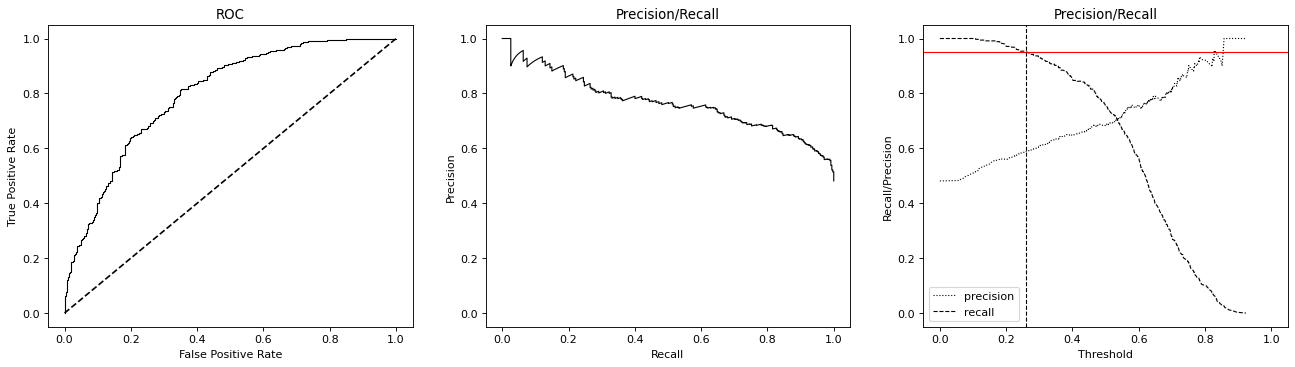

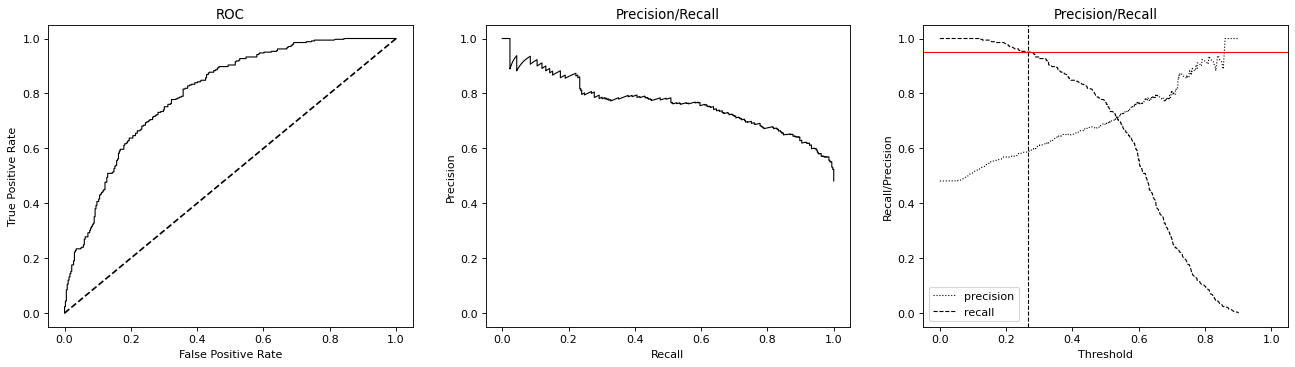

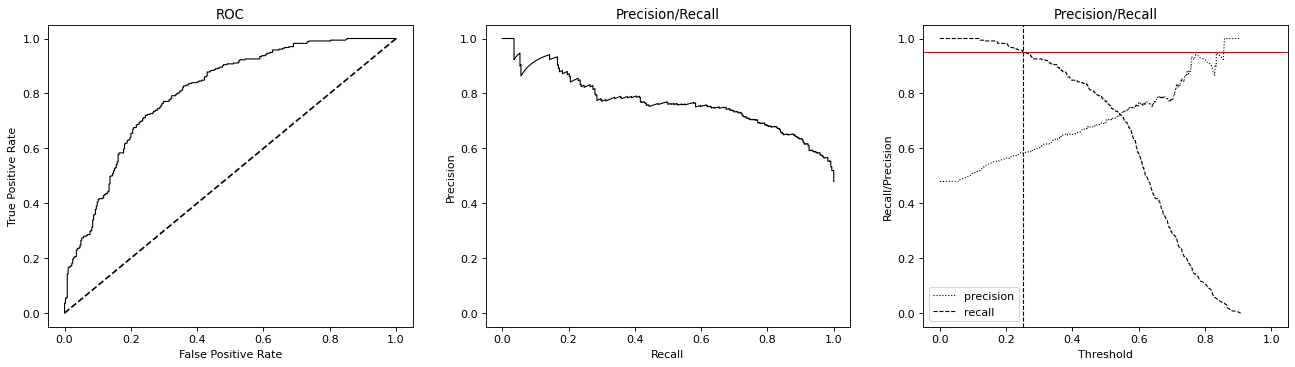

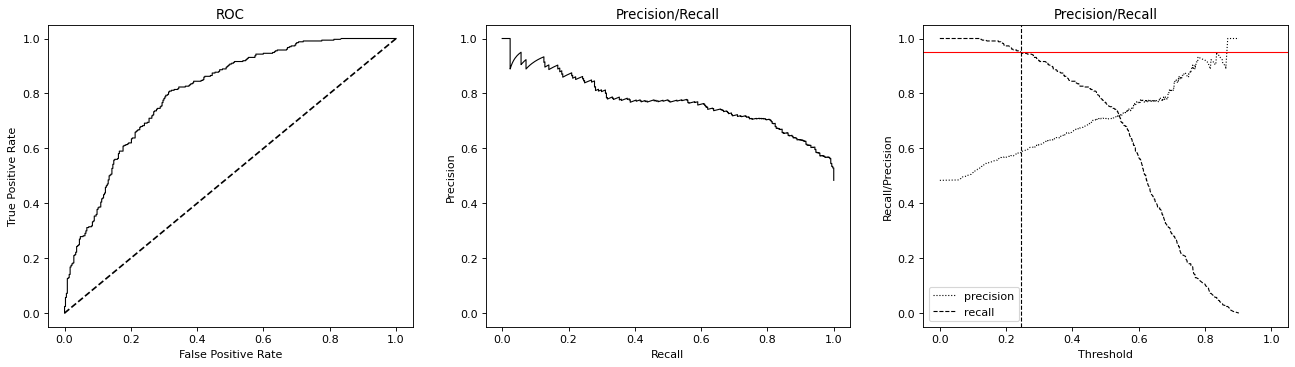

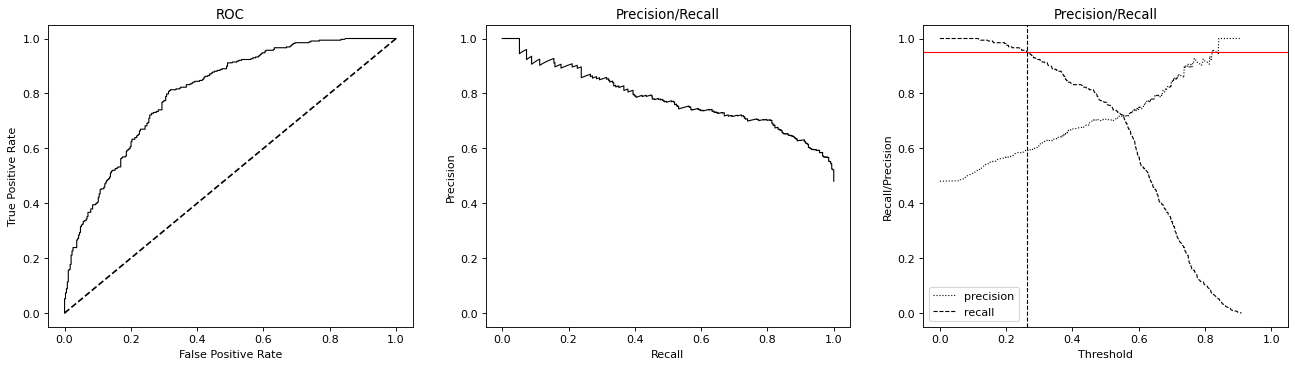

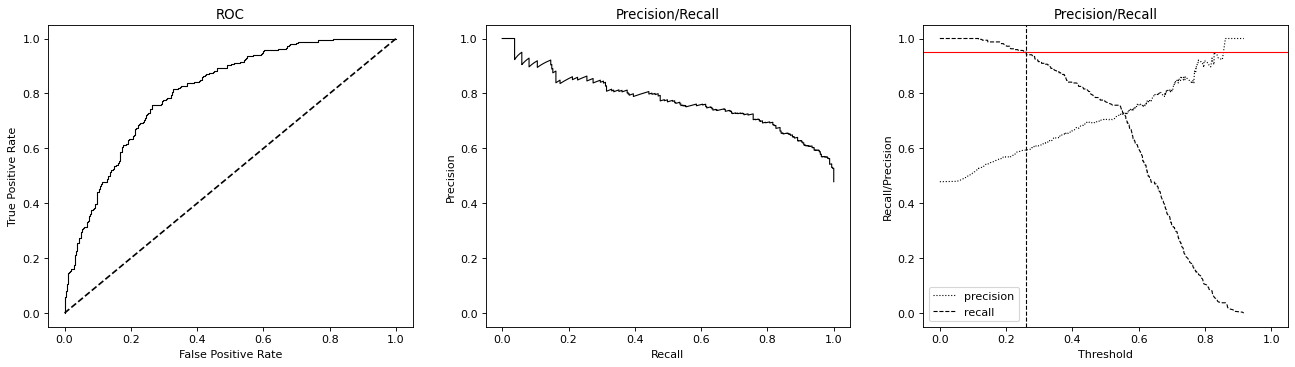

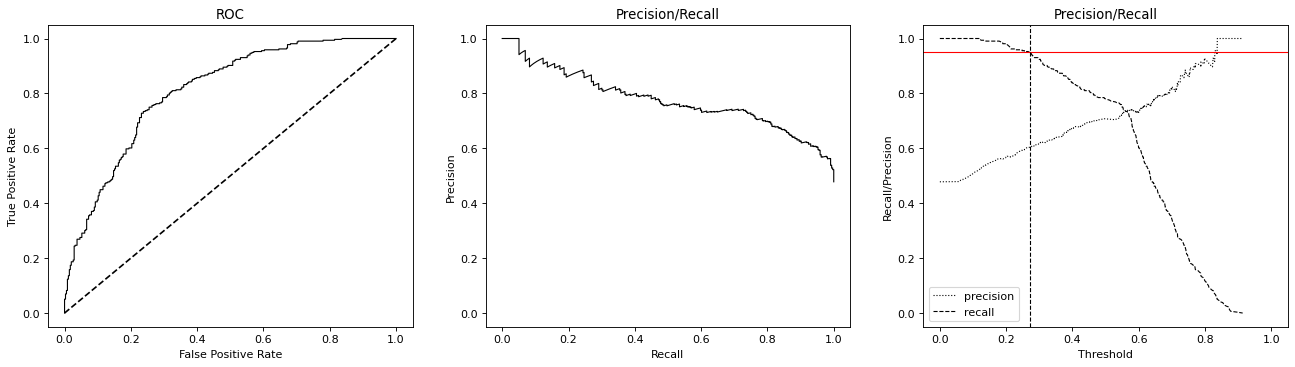

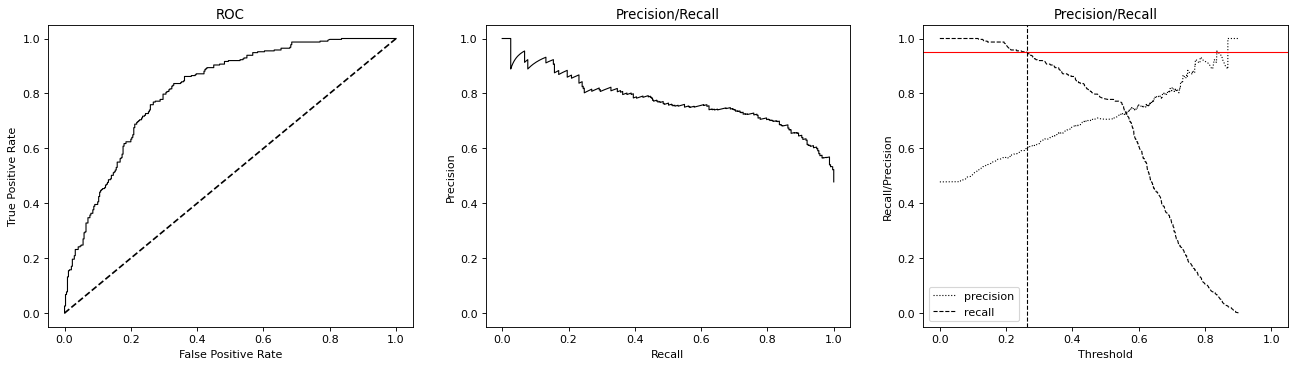

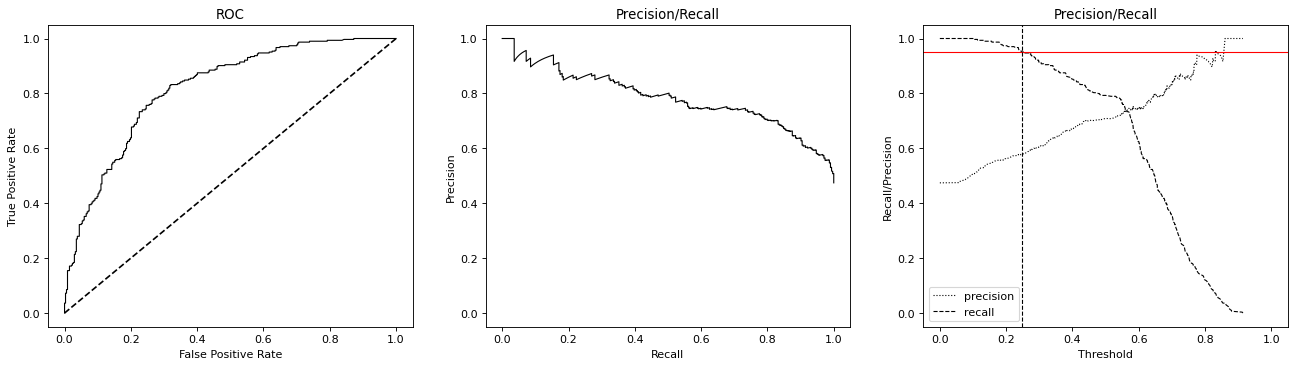

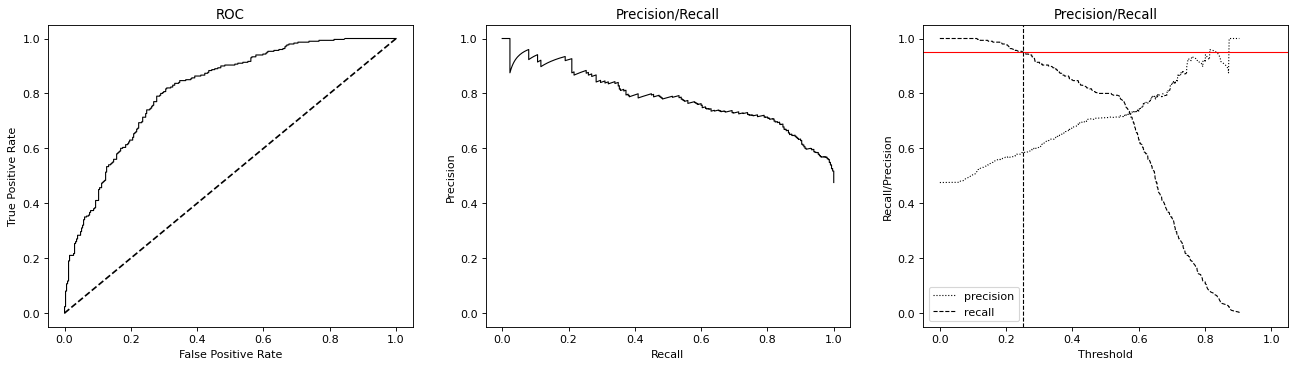

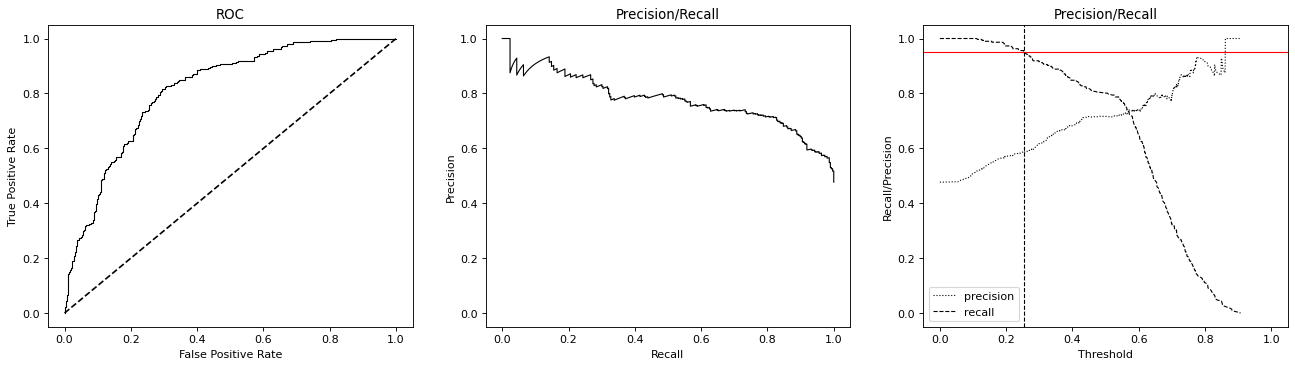

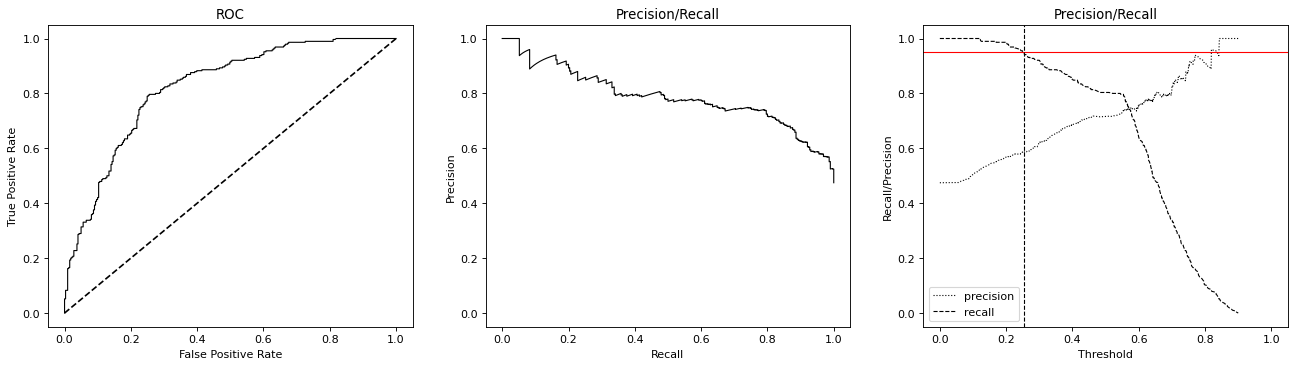

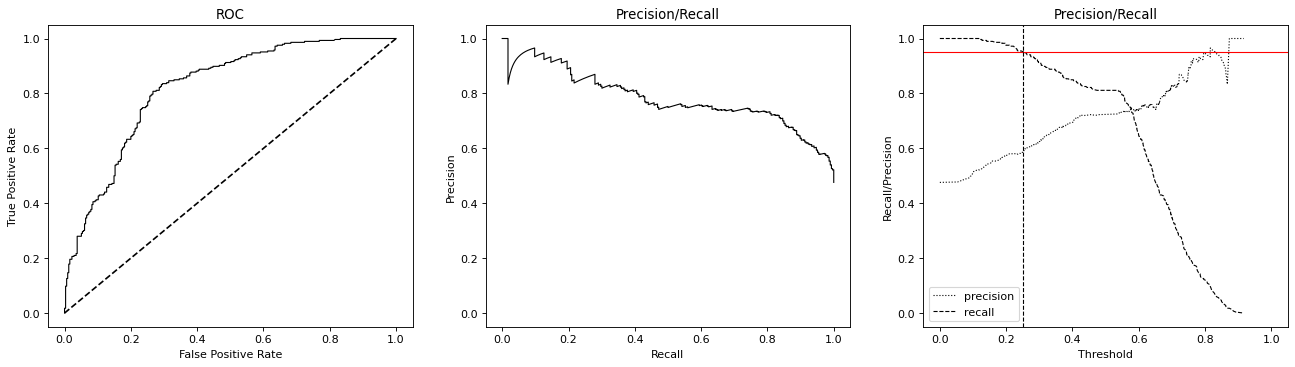

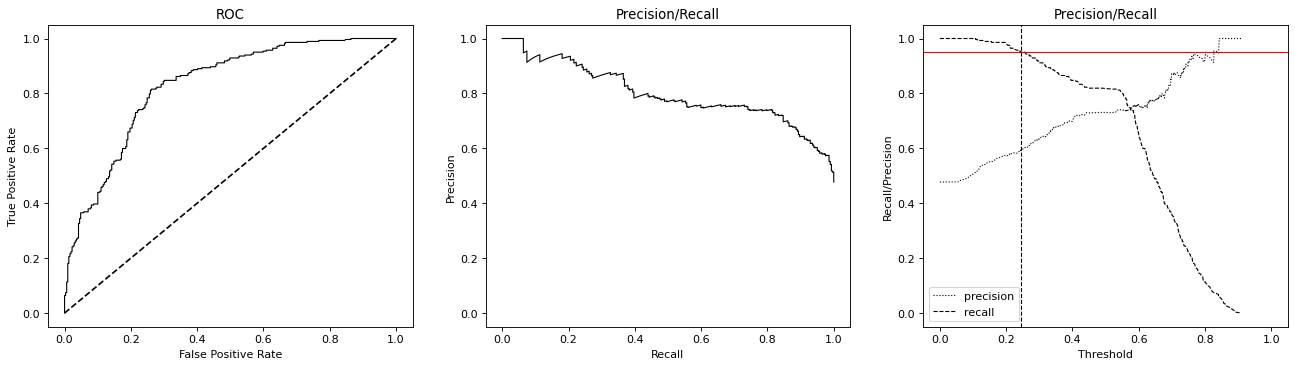

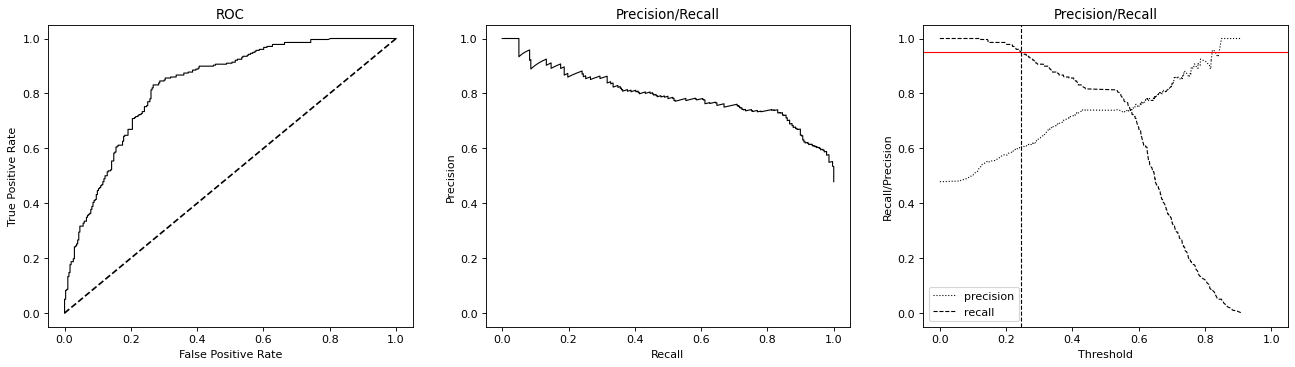

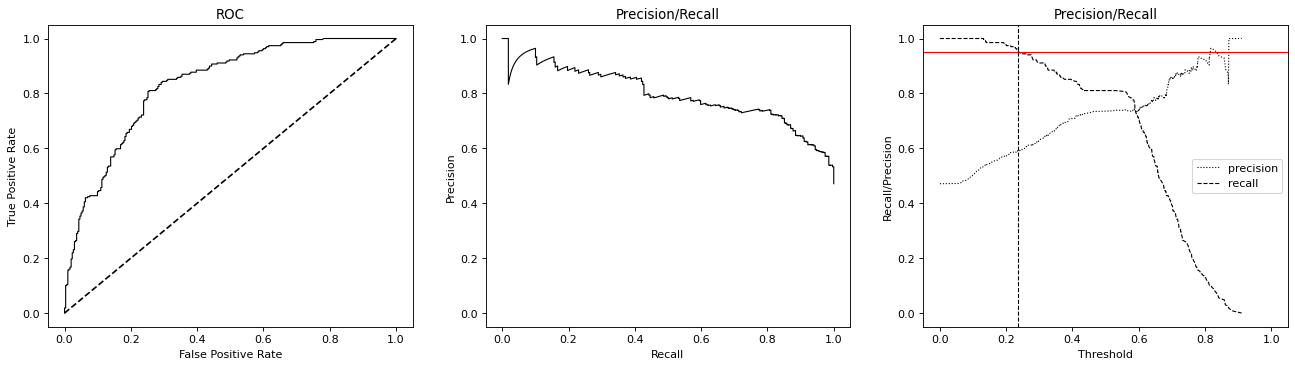

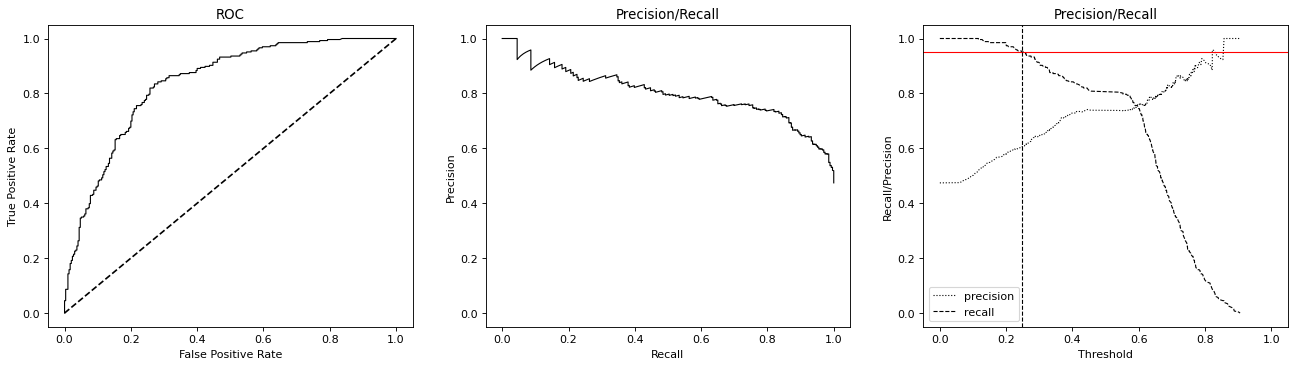

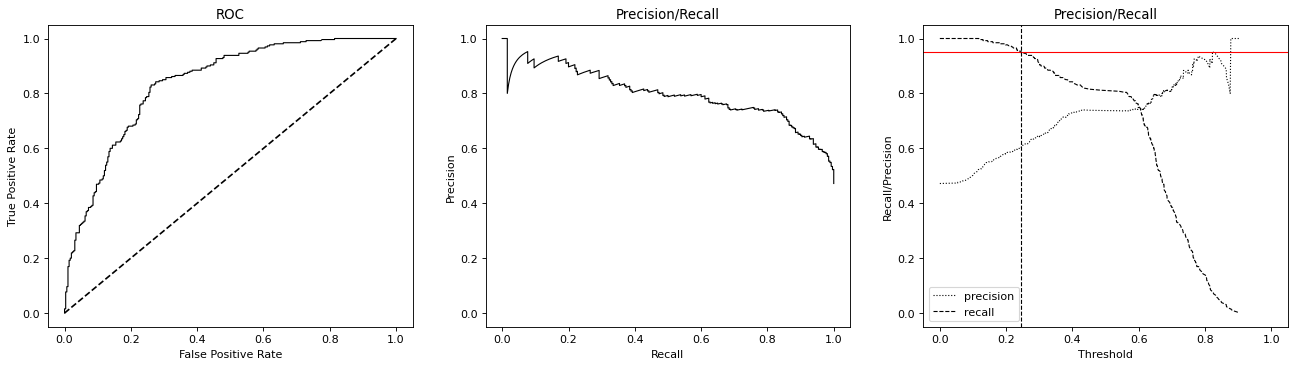

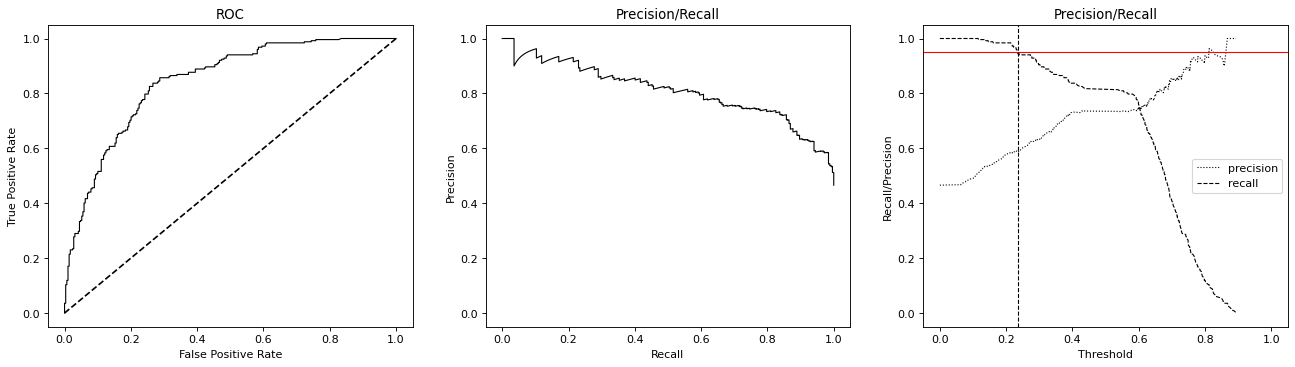

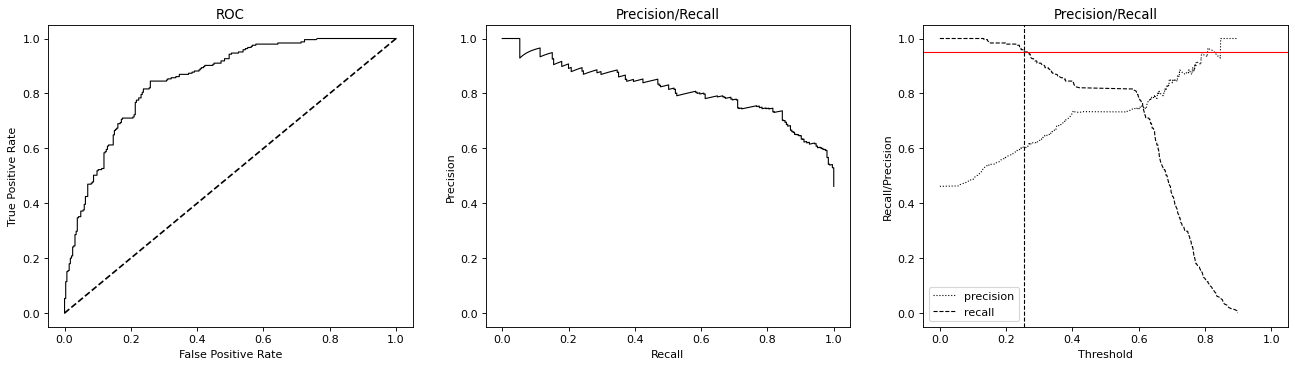

In [27]:
moved_invoices = 200
step_size = 10

scores = []

for i in tqdm(range(0, int(moved_invoices/step_size))):
    
    y_bag_validation_pred['uncertainty'] = 1-(y_bag_validation_pred[1]-.5).abs()
    uncertain_instances = y_bag_validation_pred.sort_values(by='uncertainty', ascending=False).index[:step_size]
    
    # Move uncertain training instances
    bags_train_std_miles = np.append(bags_train_std_miles, bags_validation_std_miles[uncertain_instances], axis=0)
    bags_validation_std_miles = np.delete(bags_validation_std_miles, uncertain_instances, axis=0)
    y_round_up_bag_train_1 = np.append(y_round_up_bag_train_1, y_round_up_bag_train_2[uncertain_instances], axis=0)
    y_round_up_bag_train_2 = np.delete(y_round_up_bag_train_2, uncertain_instances, axis=0)
    
    # Retrain
    rf.fit(X=bags_train_std_miles, y=y_round_up_bag_train_1)
    
    # Reevaluate
    y_bag_validation_pred = pd.DataFrame(rf.predict_proba(bags_validation_std_miles))
    min_threshold, specificity = model_evaluation(y_round_up_bag_train_2, y_bag_validation_pred)
    
    scores += [[min_threshold, specificity]]

In [29]:
scores

[[0.258991236549314, 37.967914438502675],
 [0.265105055987706, 37.669376693766935],
 [0.25103620313593017, 37.26027397260274],
 [0.2437027540045468, 36.69467787114846],
 [0.26299730720633274, 39.548022598870055],
 [0.2597020983852545, 40.285714285714285],
 [0.27071052331231227, 42.89855072463768],
 [0.2639747838836049, 41.76470588235294],
 [0.24774565730638945, 37.388724035608305],
 [0.25030418213338707, 38.670694864048336],
 [0.2549980738930911, 39.07692307692307],
 [0.25444325490554126, 39.875389408099686],
 [0.2516568985423431, 38.730158730158735],
 [0.24390163710330925, 40.1294498381877],
 [0.24470438166746272, 42.57425742574257],
 [0.23676843732715838, 41.390728476821195],
 [0.24630473962997113, 43.728813559322035],
 [0.24538918206074523, 44.329896907216494],
 [0.2346223104043132, 41.86851211072664],
 [0.2548787105732295, 46.15384615384615]]

In [28]:
pd.DataFrame(confusion_matrix(y_round_up_bag_train_2, y_bag_validation_pred.iloc[:, 1]>min_threshold), columns=['PRED_FALSE', 'PRED_TRUE'], index=['ACTUAL_FALSE', 'ACTUAL_TRUE'])

,PRED_FALSE,PRED_TRUE
ACTUAL_FALSE,132,154
ACTUAL_TRUE,12,233


In [ ]:
raise(Exception('Stop'))

# Admin queries

In [ ]:
from admin import admin_sql

cnxn_admin_sql = admin_sql.AdminSql(r'C:\Users\Ward.RFN\Downloads\credentials\AdminSQL_Credentials_Production.json')

df = cnxn_admin_sql.sql_query('''
                                SELECT i.INVOICE_NR, i.INVOICE_DATE, ild.*
                                FROM DBA.INVOICE i
                                LEFT JOIN DBA.INVOICE_LINES ild ON i.INVOICE_ID = ild.INVOICE_ID
                                WHERE i.INVOICE_ID = '589271' ''')
df.head()

In [ ]:
589271

# Search CustomerId via InvoiceNR

In [ ]:
from admin import admin_sql
invoice_nr = 2207804
print('Invoice nr = {}'.format(invoice_nr))
cnxn_sql = admin_sql.AdminSql(r'C:\Users\Ward.RFN\Downloads\credentials\AdminSQL_Credentials_Production.json')
print('Customer Id = {}'.format(cnxn_sql.sql_query('SELECT CUSTOMER_ID FROM DBA.INVOICE WHERE INVOICE_NR = \'{}\''.format(invoice_nr))['CUSTOMER_ID'].iloc[0]))